In [1]:
# First, compute the camera calibration matrix and distortion coefficients given a set of chessboard images 
# (in the camera_cal folder in the repository).

In [2]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
nx = 9
ny = 6

In [4]:
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((nx*ny,3), np.float32)
objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1,2)

In [5]:
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('camera_cal/calibration*.jpg')
len(images)

20

In [6]:
# Step through the list and search for chessboard corners
for idx, fname in enumerate(images):
    print(fname)
    st = datetime.now()
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx,ny), None)
    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)
        # Draw and display the corners
        cv2.drawChessboardCorners(img, (nx,ny), corners, ret)
        write_name = 'camera_cal/corners_found/'+str(idx)+'.jpg'
        cv2.imwrite(write_name, img)
    print('runtime: {}'.format(datetime.now()-st))        

camera_cal/calibration1.jpg
runtime: 0:00:00.231540
camera_cal/calibration10.jpg
runtime: 0:00:00.316866
camera_cal/calibration11.jpg
runtime: 0:00:00.454023
camera_cal/calibration12.jpg
runtime: 0:00:00.222508
camera_cal/calibration13.jpg
runtime: 0:00:00.236921
camera_cal/calibration14.jpg
runtime: 0:00:00.230391
camera_cal/calibration15.jpg
runtime: 0:00:00.248232
camera_cal/calibration16.jpg
runtime: 0:00:00.209895
camera_cal/calibration17.jpg
runtime: 0:00:00.168720
camera_cal/calibration18.jpg
runtime: 0:00:00.169642
camera_cal/calibration19.jpg
runtime: 0:00:00.259126
camera_cal/calibration2.jpg
runtime: 0:00:00.060168
camera_cal/calibration20.jpg
runtime: 0:00:00.405637
camera_cal/calibration3.jpg
runtime: 0:00:00.062011
camera_cal/calibration4.jpg
runtime: 0:00:00.324026
camera_cal/calibration5.jpg
runtime: 0:00:00.262321
camera_cal/calibration6.jpg
runtime: 0:00:00.336075
camera_cal/calibration7.jpg
runtime: 0:00:00.249543
camera_cal/calibration8.jpg
runtime: 0:00:00.256675
c

In [7]:
import pickle
%matplotlib inline

In [8]:
# Test undistortion on an image
testfname = 'camera_cal/calibration3.jpg'
img = cv2.imread(testfname)
img_size = (img.shape[1], img.shape[0])
img_size

(1280, 720)

In [9]:
# Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)

In [10]:
ret, mtx

(1.1868973603423718,
 array([[  1.15396093e+03,   0.00000000e+00,   6.69705357e+02],
        [  0.00000000e+00,   1.14802496e+03,   3.85656234e+02],
        [  0.00000000e+00,   0.00000000e+00,   1.00000000e+00]]))

In [11]:
# k1, k2, p1, p2, k3. 
# k for radial distortion (curved lenses), p for tangential distortion (image plane not alingned with lens)
dist

array([[ -2.41017956e-01,  -5.30721173e-02,  -1.15810355e-03,
         -1.28318856e-04,   2.67125290e-02]])

In [12]:
dst = cv2.undistort(img, mtx, dist, None, mtx)
cv2.imwrite('camera_cal/test_undist.jpg',dst)

True

In [13]:
# Save the camera calibration result for later use (we won't worry about rvecs / tvecs)
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump( dist_pickle, open( "calibration_pickle.p", "wb" ) )

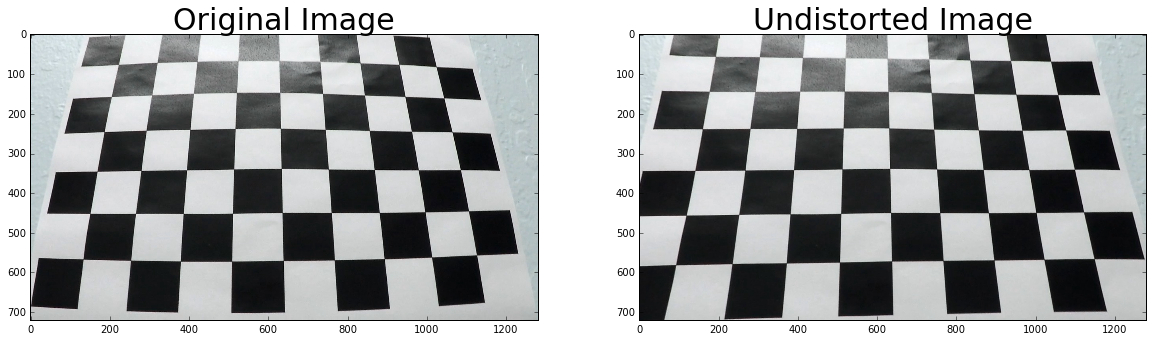

In [14]:
# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10));
ax1.imshow(img);
ax1.set_title('Original Image', fontsize=30);
ax2.imshow(dst);
ax2.set_title('Undistorted Image', fontsize=30);

In [15]:
import matplotlib.image as mpimg

In [16]:
#Next, for a series of test images (in the test_images folder in the repository):
#
#Apply the distortion correction to the raw image.
#Use color transforms, gradients, etc., to create a thresholded binary image.
#Apply a perspective transform to rectify binary image ("birds-eye view").
#Detect lane pixels and fit to find lane boundary.
#Determine curvature of the lane and vehicle position with respect to center.
#Warp the detected lane boundaries back onto the original image.
#Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.


In [347]:
image = mpimg.imread('test_images/test3.jpg')
image.shape

(720, 1280, 3)

In [348]:
#Apply the distortion correction to the raw image.
# inputs:
#   img  -- input image
#   mtx  -- camera matrix from calibrateCamera
#   dist -- distortion coefficients from calibrateCamera
def undistort(img, mtx, dist):
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    return dst

In [349]:
undist = undistort(image, mtx, dist)
#cv2.imwrite('test_images/test5_undist.jpg',undist)
undist.shape

(720, 1280, 3)

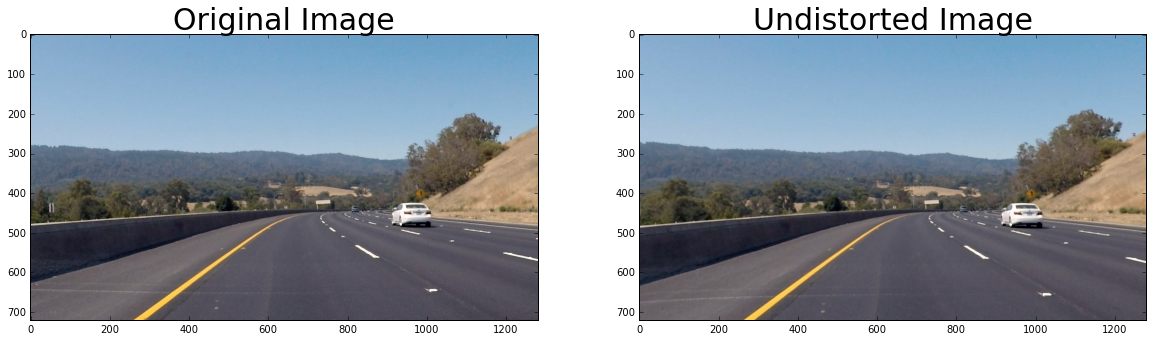

In [350]:
# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10));
ax1.imshow(image);
ax1.set_title('Original Image', fontsize=30);
ax2.imshow(undist);
ax2.set_title('Undistorted Image', fontsize=30);

In [351]:
image = undist

In [352]:
# Apply Sobel along x or y axis to img.
# Then takes an absolute value and apply thresholds.
# Returns binary image.
#   inputs
#     img          -- input image
#     orient       -- 'x' or 'y'
#     kernel_size  -- sobel operator kernel size, in px
#     thresholds   -- two values for low and high thresholds
def sobel_abs_thresholds(img, orient='x', kernel_size=3, thresholds=(0, 255)):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    if orient == 'x':
        sobel = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=kernel_size)
    else:
        sobel = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=kernel_size)
    abs_sobel = np.absolute(sobel)
    scaled_sobel = np.uint8(255*abs_sobel / np.max(abs_sobel))
    binary_output = np.zeros_like(scaled_sobel)
    binary_output[(scaled_sobel >= thresholds[0]) & (scaled_sobel <= thresholds[1])] = 1
    return binary_output

In [353]:
# Applies Sobel along x and y.
# Computes the magnitude of the gradient and applies thresholds.
# Returns binary image.
#   inputs
#     img          -- input image
#     kernel_size  -- sobel operator kernel size, in px
#     thresholds   -- two values for low and high thresholds
def sobel_magnitude_thresholds(img, kernel_size=3, thresholds=(0, 255)):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=kernel_size)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=kernel_size)
    abs_sobel = np.sqrt(sobelx**2 + sobely**2)
    scaled_sobel = np.uint8(255*abs_sobel / np.max(abs_sobel))
    binary_output = np.zeros_like(scaled_sobel)
    binary_output[(scaled_sobel >= thresholds[0]) & (scaled_sobel <= thresholds[1])] = 1
    return binary_output

In [354]:
# Applies Sobel along x and y, then computes the direction of the gradient for absolute sobel values.
# Applies thresholds.
# Returns binary image.
#   inputs
#     img          -- input image
#     kernel_size  -- sobel operator kernel size, in px
#     thresholds   -- two values for low and high thresholds
def sobel_graddir_thresholds(img, kernel_size=3, thresholds=(0., np.pi/2)):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=kernel_size)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=kernel_size)
    sobel_grad = np.arctan2(np.absolute(sobely), np.absolute(sobelx))
    binary_output = np.zeros_like(sobel_grad).astype(np.uint8)
    binary_output[(sobel_grad >= thresholds[0]) & (sobel_grad <= thresholds[1])] = 1
    return binary_output

In [355]:
# Converts image to HLS color space.
# Applies thresholds to the S-channel.
# Returns binary image.
#   inputs
#     img          -- input image
#     thresholds   -- two values for low and high thresholds
def hls_s_thresholds(img, thresholds=(0, 255)):
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS) 
    s = hls[:,:,2]
    binary_output = np.zeros_like(s)
    binary_output[(s >= thresholds[0]) & (s <= thresholds[1])] = 1
    return binary_output

In [356]:
def thresholded_binary(image):
    # sobel x
    sx_kernel = 3
    sx_thresh = (20, 100)
    sx_binary = sobel_abs_thresholds(image, orient='x', kernel_size=sx_kernel, thresholds=sx_thresh)
    # sobel y
    sy_kernel = 3
    sy_thresh = (30, 100)
    sy_binary = sobel_abs_thresholds(image, orient='y', kernel_size=sy_kernel, thresholds=sy_thresh)
    # sobel magnitude
    smag_kernel = 5
    smag_thresh = (30,100)
    smag_binary = sobel_magnitude_thresholds(image, kernel_size=smag_kernel, thresholds=smag_thresh)
    # sobel gradient direction
    sgraddir_kernel = 7
    sgraddir_thresh = (0.7, 1.3)
    sgraddir_binary = sobel_graddir_thresholds(image, kernel_size=sgraddir_kernel, thresholds=sgraddir_thresh)
    # HSV's S threshold
    s_thresh = (170,255)
    s_binary = hls_s_thresholds(image, thresholds=s_thresh)
    # x gradient and S threshold
    combined = np.zeros_like(sx_binary)
    combined[(s_binary == 1) | (sx_binary == 1)] = 1
    # x gradient and magnitude
    combined0 = np.zeros_like(sx_binary)
    combined0[(sx_binary == 1) & (smag_binary == 1)] = 1   
    # y gradient and grad direction
    combined3 = np.zeros_like(sy_binary)
    combined3[(sy_binary == 1) & (sgraddir_binary == 1)] = 1    
    # use previous combined, but add pixels where gradient magnitude and direction are activated
    combined2 = np.copy(combined)
    combined2[((smag_binary == 1) & (sgraddir_binary == 1))] = 1
    # combined2 OR combined3
    combined4 = np.copy(combined2)
    combined4[combined3 == 1] = 1
    # combined4 OR combined0
    combined5 = np.copy(combined4)
    combined5[combined0 == 1] = 1
    return combined5

In [357]:
thresholded_binary_image = thresholded_binary(image)

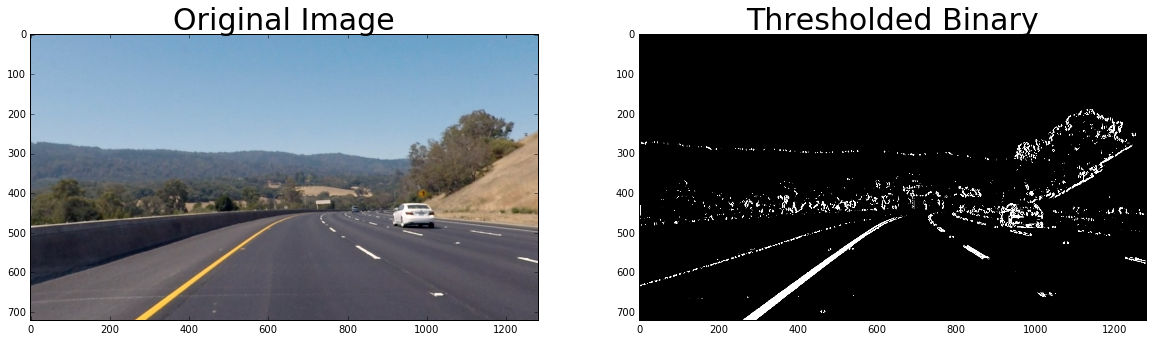

In [358]:
# Visualize combined
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10));
ax1.imshow(image);
ax1.set_title('Original Image', fontsize=30);
ax2.imshow(thresholded_binary_image, cmap='gray');
ax2.set_title('Thresholded Binary', fontsize=30);

In [359]:
# Apply a perspective transform to rectify binary image ("birds-eye view").

In [360]:
copy = np.copy(thresholded_binary_image)
color_copy = np.dstack((copy, copy, copy))
src = np.float32([[85,670], 
                  [515,480], 
                  [765,480], 
                  [1195,670]])
pts = np.array(src)
cv2.fillPoly(color_copy, np.int_([pts]), (0,255,0));
result = cv2.addWeighted(image, 1, color_copy, 0.3, 0)

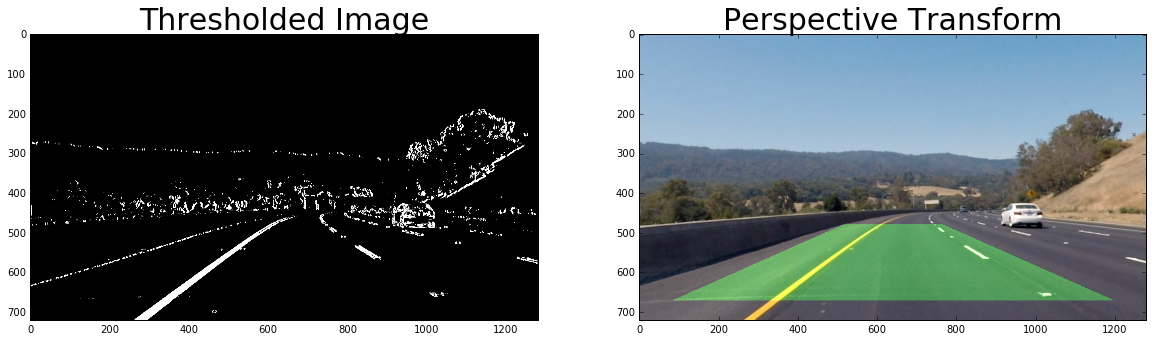

In [361]:
# Visualize transform area
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10));
ax1.imshow(copy, cmap='gray');
ax1.set_title('Thresholded Image', fontsize=30);
ax2.imshow(result);
ax2.set_title('Perspective Transform', fontsize=30);

In [362]:
# Does perspective transform for the part of the road between lanes.
# Takes undistorted image
# Returns transfromed image, the matrix used to transform it and the matrix for inverse transform
def perspective_transform(img, M=None, Minv=None):
    imshape = img.shape
    
    if (M is None):
        src = np.float32([[85,670], 
                          [515,480], 
                          [765,480], 
                          [1195,670]])
        dst = np.float32([[imshape[1]*.05, imshape[0]*.95],
                          [imshape[1]*.05, imshape[0]*.05],
                          [imshape[1]*.95, imshape[0]*.05],
                          [imshape[1]*.95, imshape[0]*.95]])
        M = cv2.getPerspectiveTransform(src, dst)
        Minv = cv2.getPerspectiveTransform(dst, src)

    warped = cv2.warpPerspective(img, M, (imshape[1], imshape[0]), flags=cv2.INTER_LINEAR)
    return warped, M, Minv

In [363]:
# Does perspective transform for the part of the road between lanes.
# Takes undistorted image
# Returns transfromed image, the matrix used to transform it and the matrix for inverse transform
def perspective_transform(img, M=None, Minv=None):
    imshape = img.shape
    
    if (M is None):
        src = np.float32([[85,670], 
                          [515,480], 
                          [765,480], 
                          [1195,670]])
        dst = np.float32([[imshape[1]*.0, imshape[0]*1.],
                          [imshape[1]*.0, imshape[0]*.0],
                          [imshape[1]*1., imshape[0]*.0],
                          [imshape[1]*1., imshape[0]*1.]])
        M = cv2.getPerspectiveTransform(src, dst)
        Minv = cv2.getPerspectiveTransform(dst, src)

    warped = cv2.warpPerspective(img, M, (imshape[1], imshape[0]), flags=cv2.INTER_LINEAR)
    return warped, M, Minv

In [364]:
top_down_binary, M, Minv = perspective_transform(thresholded_binary_image, None, None)

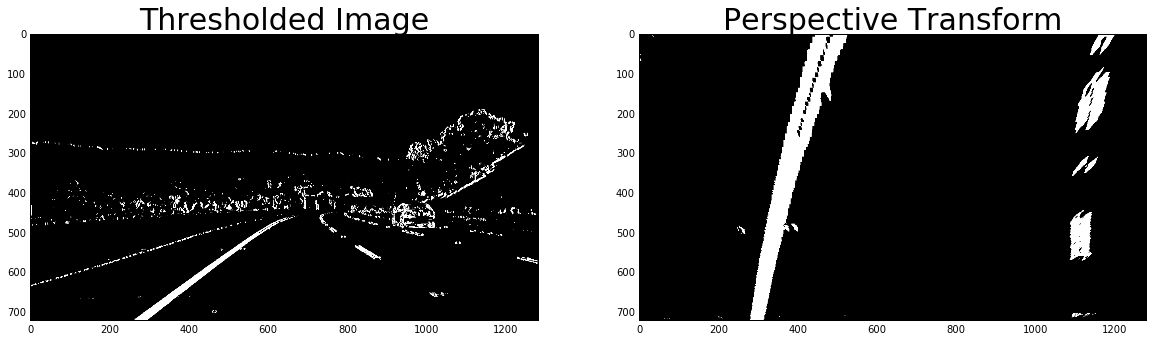

In [365]:
# Visualize
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10));
ax1.imshow(thresholded_binary_image, cmap='gray');
ax1.set_title('Thresholded Image', fontsize=30);
ax2.imshow(top_down_binary, cmap='gray');
ax2.set_title('Perspective Transform', fontsize=30);

In [366]:
#Detect lane pixels and fit to find lane boundary.

In [492]:
# Define a class to receive the characteristics of each line detection
class Line():
    # class constants that are same for all instances
    
    # pct width of total image that one lane can occupy. used to decide on histograms
    _pct_image_width_lane_width_max=0.1
    # for the sliding window method -- height of the sliding window
    _pct_image_height_slice=0.1
    # Define conversions in x and y from pixels space to meters. depends on the end of pipeline 'top-down' image
    #ym_per_pix = 30/720 # meters per pixel in y dimension
    _ym_per_pix = 3/130 # meters per pixel in y dimension. based on dashed line=3m
    #xm_per_pix = 3.7/700 # meteres per pixel in x dimension. based on lane width = 3.7m
    _xm_per_pix = 3.7/840 # meteres per pixel in x dimension
    # history length for confirming detection
    _n = 5
    
    
    def __init__(self):
        # was the line detected in the last iteration?
        self._detected = False
        # number of last recent failed fits
        self._failed_fits = 0
        # x values of the last n fits of the line
        self._recent_xfitted = []
        #average x values of the fitted line over the last n iterations
        self._bestx = None
        #polynomial coefficients averaged over the last n iterations
        self._best_fit = None
        #polynomial coefficients for the most recent fit in px coordinates
        self._current_fit_px = [np.array([False])]  
        #polynomial coefficients for the most recent fit in m coordinates
        self._current_fit_m = [np.array([False])]  
        #radius of curvature of the line in pixels
        self._radius_of_curvature = None 
        #radius of curvature of the line in meters
        self._radius_of_curvature_m = None 
        #distance in px of vehicle center from the line
        self._line_pos_px = None 
        #distance in m of vehicle center from the line
        self._line_pos_m = None 
        #difference in fit coefficients between last and new fits
        self._diffs = np.array([0,0,0], dtype='float') 
        #x values for detected line image pixels
        self._img_allx = None  
        #y values for detected line image pixels
        self._img_ally = None
        #x values for detected sliding window pixels
        self._histogram_allx = None  
        #y values for detected sliding pixels
        self._histogram_ally = None
        #x values for fitted pixels
        self._line_allx = None  
        #y values for fitted pixels
        self._line_ally = None
        #devirative of fitted line wrt y at the bottom of top-down view, in px coordinates
        self._y_deriv = None
        
    # find radius of curvature closest to the bottom of the image
    def calc_radius_of_curvature(self):
        # curvature in pixels
        a = self._current_fit_px[0]
        b = self._current_fit_px[1]
        c = self._current_fit_px[2]
        y_eval = np.max(self._line_ally)
        self._radius_of_curvature = (1.0+(2.0*a*y_eval+b)**2)**1.5 / np.abs(2*a)
        # curvature in meters
        self._current_fit_m = np.polyfit(self._line_ally*self._ym_per_pix, self._line_allx*self._xm_per_pix, 2)
        a = self._current_fit_m[0]
        b = self._current_fit_m[1]
        c = self._current_fit_m[2]
        self._radius_of_curvature_m = ((1.0 + (2.0*a*y_eval + b)**2)**1.5) / np.abs(2*a)
        # derivative of line wrt y at the bottom
        self._y_deriv = 2*a*y_eval

        
    # given binary top-down view of lane pixels find possible left and right x values, in pixels
    # using histogram method
    # Used as static method. Does not change Line state.
    #    inputs:
    #       image                           -- binary image with top-down (perspective-transformed) view of lane lines. 
    #                                       -- assume x and y coordinates are reversed
    #    outputs:
    #        left_lane_x_px                 -- initial estimate for left lane x coordinate or None
    #        right_lane_x_px                -- initial estimate for right lane x coordinate or None
    def find_left_right_x(self, image):
        histogram1 = np.sum(image, axis=0)
        width = len(histogram1)
        # find the most prominent peak in the histogram
        imax1 = np.argmax(histogram1)
        max1 = histogram1[imax1]
        # remove the peak and pct_image_width_lane_width_max elements around it.
        histogram2 = np.copy(histogram1)
        nx = width*self._pct_image_width_lane_width_max
        histogram2[imax1-int(nx/2.0) : imax1+int(nx/2.0)] = 0
        # find second highest peak
        imax2 = np.argmax(histogram2)
        max2 = histogram2[imax2]
        # remove the second peak and pct_image_width_lane_width_max elements around it.
        histogram3 = np.copy(histogram2)
        histogram3[imax2-int(nx/2.0) : imax2+int(nx/2.0)] = 0
        # find third highest peak
        imax3 = np.argmax(histogram3)
        max3 = histogram3[imax3]

        l = min(imax1, imax2)
        r = max(imax1, imax2)

        # decide what kind of situation we have
        if max1/max3<1.5:
            # inconsequential difference between topmost peak and the 'background'
            return None, None
        if max2/max3<1.5:
            # inconsequential difference between second peak and the 'background'
            return None if imax2==l else l, None if imax2==r else r
        return l, r

    # use sliding window to find the potential lane pixels.
    # then fit second order polynomial to represent the line
    #    inputs:
    #       image                           -- binary image with top-down (perspective-transformed) view of lane lines. 
    #                                       -- assume x and y coordinates are reversed
    #       initial_x                       -- x from which to start finding the line
    def fit_from_x_on_image(self, image, initial_x):
        (height, width) = image.shape # in the image operations x and y will be reversed
        # sliding window points
        nx = int(width*self._pct_image_width_lane_width_max)
        ny = int(height*self._pct_image_height_slice)
        y_points = np.arange(ny,height+1,ny)
        x_points = np.zeros_like(y_points)
        x_points[-1] = initial_x
        imgcopy = np.zeros_like(image)
        # sliding window loop
        failed_window_points = 0
        for i in range(len(y_points)-1,0,-1):
            slice_y_bottom = y_points[i]
            slice_y_top = slice_y_bottom - ny
            slice_x_bottom = x_points[i]
            imgslice = image[slice_y_top:slice_y_bottom,:]
            ones = np.zeros_like(imgslice)
            ones[:,slice_x_bottom-int(nx/2):slice_x_bottom+int(nx/2)] = 1
            imgslice2 = np.bitwise_and(imgslice, ones)
            imgcopy[slice_y_top:slice_y_bottom,:] = imgslice2
            (y,x) = np.nonzero(imgslice2) # x and y are here in the 'opposite' order
            if (len(set(y))>int(ny*.30)):
                # looks like 'vertical' line segment
                slice_x_top = np.mean(x)
            else:
                failed_window_points += 1
                if self._detected:
                    # if we fitted line successfully previously, use last fit for best estimate of top x in window
                    slice_x_top = np.polyval(self._current_fit_px, slice_y_top)
                else:
                    slice_x_top = slice_x_bottom
            x_points[i-1] = slice_x_top
        # fit polymonial to x,y from sliding window loop
        last = self._current_fit_px
        self._current_fit_px = np.polyfit(y_points, x_points, 2)
        self._diff = self._current_fit_px - last
        self._line_ally = np.array(range(0,height))
        self._line_allx = np.polyval(self._current_fit_px, self._line_ally)
        # save/calculate additional data and y derivative at bottom (to test for parallel lines outside)
        self._img_ally, self._img_allx = np.nonzero(imgcopy)
        self.calc_radius_of_curvature() # also does y_deriv
        self._line_pos_px = -(int(width/2) - self._line_allx[-1]) #distance in px of the line vs vehicle center
        self._line_pos_m = self._line_pos_px * self._xm_per_pix   #distance in m of the line vs vehicle center 
        self._histogram_allx = x_points # remember sliding window points
        self._histogram_ally = y_points
        
        # estimate confidence by looking at number of sliding window points that detect something like a line segment
        # or whether line derivative wrt y is too big
        if (failed_window_points > len(y_points)*0.70 or abs(self._y_deriv)>10.0 ):
            self._failed_fits += 1
        else:
            self._failed_fits = 0

        # draw extra annotations on temp result
        imgcopy = cv2.cvtColor(imgcopy*255, cv2.COLOR_GRAY2BGR)
        # plot points estimated from sliding histogram window
        for p in zip(self._histogram_allx, self._histogram_ally):
            cv2.circle(imgcopy, p, radius=6, color=(255,0,0), thickness=-1)
        # plot fitted lines
        cv2.polylines(imgcopy, 
                      np.int32([np.dstack([self._line_allx, self._line_ally])[0]]), 
                      isClosed=0, 
                      color=(0,0,255), thickness=5)
        # update historical lists
        self._recent_xfitted.append(self._line_allx[-1]) # bottom x from the fitted line
        if len(self._recent_xfitted)>self._n:
            self._recent_xfitted.pop(0)
        self._bestx = np.mean(self._recent_xfitted) # average bottom x from last few fits
        # average coefficients of the fit over last few fits
        i = len(self._recent_xfitted)
        if i==1:
            self._best_fit = np.zeros_like(self._current_fit_px)
        self._best_fit = (self._best_fit*(i-1) + self._current_fit_px) / float(i)
        if i==self._n:
            self._detected = True

        return imgcopy
    
    
    # go back to last good fit
    #    inputs:
    #       image                           -- binary image with top-down (perspective-transformed) view of lane lines. 
    #                                       -- assume x and y coordinates are reversed
    #       initial_x                       -- x from which to start finding the line
    def use_last_good_fit(self, image):
        (height, width) = image.shape # in the image operations x and y will be reversed
        
        if len(self._recent_xfitted)<self._n:
            # not enough history
            return None
        
        # use last good coefficients
        self._current_fit_px = self._best_fit

        # sliding window points
        nx = int(width*self._pct_image_width_lane_width_max)
        ny = int(height*self._pct_image_height_slice)
        y_points = np.arange(ny,height+1,ny)
        x_points = np.zeros_like(y_points)
        x_points[-1] = self._bestx
        imgcopy = np.zeros_like(image)
        # sliding window loop
        for i in range(len(y_points)-1,0,-1):
            slice_y_bottom = y_points[i]
            slice_y_top = slice_y_bottom - ny
            slice_x_bottom = x_points[i]
            imgslice = image[slice_y_top:slice_y_bottom,:]
            ones = np.zeros_like(imgslice)
            ones[:,slice_x_bottom-int(nx/2):slice_x_bottom+int(nx/2)] = 1
            imgslice2 = np.bitwise_and(imgslice, ones)
            imgcopy[slice_y_top:slice_y_bottom,:] = imgslice2
            (y,x) = np.nonzero(imgslice2) # x and y are here in the 'opposite' order
            slice_x_top = np.mean(x)
            slice_x_top = np.polyval(self._current_fit_px, slice_y_top)
            x_points[i-1] = slice_x_top
        
        self._line_ally = np.array(range(0,height))
        self._line_allx = np.polyval(self._current_fit_px, self._line_ally)
        # save/calculate additional data and y derivative at bottom (to test for parallel lines outside)

        self._img_ally, self._img_allx = np.nonzero(imgcopy)
        self.calc_radius_of_curvature() # also does y_deriv
        self._line_pos_px = -(int(width/2) - self._line_allx[-1]) #distance in px of the line vs vehicle center
        self._line_pos_m = self._line_pos_px * self._xm_per_pix   #distance in m of the line vs vehicle center 
        self._histogram_allx = x_points # remember sliding window points
        self._histogram_ally = y_points
        
        # just marking it to the outside as not 'great' fit
        self._failed_fits += 1

        # draw extra annotations on temp result
        imgcopy = cv2.cvtColor(imgcopy*255, cv2.COLOR_GRAY2BGR)
        # plot points estimated from sliding histogram window
        for p in zip(self._histogram_allx, self._histogram_ally):
            cv2.circle(imgcopy, p, radius=6, color=(255,0,0), thickness=-1)
        # plot fitted lines
        cv2.polylines(imgcopy, 
                      np.int32([np.dstack([self._line_allx, self._line_ally])[0]]), 
                      isClosed=0, 
                      color=(0,0,255), thickness=5)

        return imgcopy


In [368]:
(height, width) = top_down_binary.shape
# only use bottom half of the image for initial x detection
# build histogram of lower half of the image, closer to the car -- lines should be more straight
lx, rx = Line().find_left_right_x(top_down_binary[int(height/2):,:])
lline = Line()
rline = Line()

In [369]:
lx, rx

(320, 1107)

In [500]:
# class to combine the lane detection pipeline and keep track of both lines and produce output images
class LaneDetector:
    # initial number of images to be processed before detecting lane, assuming video
    _initial_images_number = 5
    # maximum difference of derivatives between two lines at the bottom
    _max_deriv_diff = 5.0
    # maximum lane width in meters
    _max_lane_width_m = 4.4
    # miminum lane width in meters
    _min_lane_width_m = 1.7
        
    # takes distortion matrix and coefficients calibrated for the camera
    def __init__(self, mtx, dist):
        # undistortion matrix and coefficients
        self._mtx = np.copy(mtx)
        self._dist = np.copy(dist)
        # objects to track left and right lines
        self._lline = Line()
        self._rline = Line()
        # original image
        self._original_image = None
        # un-distorted image
        self._undistorted_image = None
        # thresholded binary combining different edge/contrast detection techniques
        self._thresholded_binary_image = None
        # road in front, perspective-transformed
        self._top_down_binary_image = None
        # perspective transform matrix and inverse
        self._M, self._Minv = None, None
        # binary image of road ahead with annotated fitted lines
        self._top_down_binary_with_lines_image = None
        # original undistorted image annotated with fitted lines
        self._original_annotated_image = None
        # image counter
        self._image_number = 0
        # number of bad sequential frames we encountered
        self._bad_frames = 0
        self._last_bad_frame = 0
        
    # put text on top-down binary view
    def annotate_top_down_binary(self):
        font = cv2.FONT_HERSHEY_SIMPLEX
        # curvature
        if self._lline._detected:
            lc = '{:,.2f}'.format(self._lline._radius_of_curvature)
        else:
            lc = 'NAN'
        if self._rline._detected:
            rc = '{:,.2f}'.format(self._rline._radius_of_curvature)
        else:
            rc = 'NAN'
        s = 'curvature: Left {} px, Right {} px'.format(lc, rc)
        cv2.putText(self._top_down_binary_with_lines_image, s, (350,100), font, fontScale=0.7, color=(0,255,0))
        # line distance from car center
        if self._lline._detected:
            ld = '{:,.2f}'.format(self._lline._line_pos_px)
        else:
            ld = 'NAN'
        if self._rline._detected:
            rd = '{:,.2f}'.format(self._rline._line_pos_px)
        else:
            rd = 'NAN'
        s2 = 'lane dist from center: Left {} px, Right {} px'.format(ld, rd)
        cv2.putText(self._top_down_binary_with_lines_image, s2, (350,150), font, fontScale=0.7, color=(0,255,0))
        s2 = 'derivs: Left {} px, Right {} px'.format(self._lline._y_deriv, self._rline._y_deriv)
        cv2.putText(self._top_down_binary_with_lines_image, s2, (350,200), font, fontScale=0.7, color=(0,255,0))

    # apply the lines and info text to the original undistorted image
    def annotate_undistorted_image(self):
        # draw area if both line detected
        _color_warp = np.zeros_like(self._original_image)
        if self._lline._detected and self._rline._detected:
            # Recast the x and y points into usable format for cv2.fillPoly()
            _pts_left = np.array([np.transpose(np.vstack([self._lline._line_allx, self._lline._line_ally]))])
            _pts_right = np.array([np.flipud(np.transpose(np.vstack([self._rline._line_allx, self._rline._line_ally])))])
            _pts = np.hstack((_pts_left, _pts_right))
            # Draw the lane onto the warped blank image
            cv2.fillPoly(_color_warp, np.int_([_pts]), (0,255, 0))
        # Warp the blank back to original image space using inverse perspective matrix (Minv)
        _newwarp = cv2.warpPerspective(_color_warp, self._Minv, (width,height)) 
        # Combine the result with the original image
        self._original_annotated_image = cv2.addWeighted(self._undistorted_image, 1, _newwarp, 0.3, 0)

        # draw left line if detected
        _color_warp = np.zeros_like(self._original_image)
        if (self._lline._detected):
            if (self._lline._failed_fits > 0):
                color = (255,0,0)
            else:
                color = (0,128,128)
            cv2.polylines(_color_warp, 
                          np.int32([np.dstack([self._lline._line_allx, self._lline._line_ally])[0]]), 
                          isClosed=0, 
                          color=color, thickness=60)
        # draw right line if detected
        if (self._rline._detected):
            if (self._rline._failed_fits > 0):
                color = (255,0,0)
            else:
                color = (0,128,128)
            cv2.polylines(_color_warp, 
                          np.int32([np.dstack([self._rline._line_allx, self._rline._line_ally])[0]]), 
                          isClosed=0, 
                          color=color, thickness=60)
        # Warp the blank back to original image space using inverse perspective matrix (Minv)
        _newwarp = cv2.warpPerspective(_color_warp, self._Minv, (width,height)) 
        # Combine the result with the original image
        self._original_annotated_image = cv2.addWeighted(self._original_annotated_image, 1, _newwarp, 1.0, 0)
        
        
        # add text details
        _overlay = np.zeros_like(self._original_image)
        cv2.rectangle(_overlay, (250,60), (1100,200), (255,255,255), -1)
        self._original_annotated_image = cv2.addWeighted(self._original_annotated_image, 1, _overlay, 0.8, 0)
        font = cv2.FONT_HERSHEY_TRIPLEX
        
        # curvature
        if self._lline._detected:
            if abs(self._lline._radius_of_curvature_m) < 10000:
                lc = '{:,.0f}m'.format(self._lline._radius_of_curvature_m)
            else:
                lc = 'STRAIGHT'
        else:
            lc = 'NAN'
        if self._rline._detected:
            if abs(self._rline._radius_of_curvature_m) < 10000:
                rc = '{:,.0f}m'.format(self._rline._radius_of_curvature_m)
            else:
                rc = 'STRAIGHT'
        else:
            rc = 'NAN'
        s = 'curvature: Left {}, Right {}'.format(lc, rc)
        cv2.putText(self._original_annotated_image, s, (300,100), 
                    font, fontScale=0.7, color=(0,0,0), lineType=cv2.LINE_AA)
        
        # line distance from car center
        if self._lline._detected:
            ld = '{:,.2f}m'.format(self._lline._line_pos_m)
        else:
            ld = 'NAN'
        if self._rline._detected:
            rd = '{:,.2f}m'.format(self._rline._line_pos_m)
        else:
            rd = 'NAN'
        s2 = 'lane distance from car center: Left {}, Right {}'.format(ld, rd)
        cv2.putText(self._original_annotated_image, s2, (300,130), 
                    font, fontScale=0.7, color=(0,0,0), lineType=cv2.LINE_AA)

        if self._lline._detected and self._rline._detected:
            s3 = 'car off center by: {:,.2f}m'.format(self._lline._line_pos_m+self._rline._line_pos_m)
        else:
            s3 = 'car off center by: UNDEFINED'
        cv2.putText(self._original_annotated_image, s3, (300,160), 
                    font, fontScale=0.7, color=(0,0,0), lineType=cv2.LINE_AA)
        
    def create_diagnostic_view(self):
        (height, width, _) = self._original_image.shape
        self._diagnostic_view = np.zeros((height*2, width, 3), dtype=np.uint8)
        self._diagnostic_view[0:height, 0:width] = self._original_annotated_image
        rh = int(height/2)
        rw = int(width/2)
        # distorted original image
        self._diagnostic_view[height:(height+rh), 0:(rw)] = cv2.resize(self._original_image, (rw,rh), interpolation=cv2.INTER_AREA) 
        # thresholded binary
        img = cv2.cvtColor(self._thresholded_binary_image*255, cv2.COLOR_GRAY2BGR)
        self._diagnostic_view[height:(height+rh), rw:(2*rw)] = cv2.resize(img, (rw,rh), interpolation=cv2.INTER_AREA) 
        # perspective-transformed binary
        img = cv2.cvtColor(self._top_down_binary_image*255, cv2.COLOR_GRAY2BGR)
        self._diagnostic_view[(height+rh):(height+2*rh), 0:(rw)] = cv2.resize(img, (rw,rh), interpolation=cv2.INTER_AREA) 
        # annotated binary
        self._diagnostic_view[(height+rh):(height+2*rh), rw:(2*rw)] = cv2.resize(self._top_down_binary_with_lines_image, (rw,rh), interpolation=cv2.INTER_AREA) 
        
        
    def process_image(self, image, initial_images_number=1, return_diagnostic_views=True):
        self._original_image = np.copy(image)
        self._image_number += 1
        (height, width, _) = self._original_image.shape
        # un-distort image
        self._undistorted_image = undistort(self._original_image, self._mtx, self._dist)
        # produce thresholded binary
        self._thresholded_binary_image = thresholded_binary(self._undistorted_image)
        # perspective transform of the road in front
        self._top_down_binary_image, self._M, self._Minv = perspective_transform(self._thresholded_binary_image, 
                                                                                 self._M, self._Minv)

        # initial detection or detection after unsuccessful fits in preceding frames
        lx, rx = None, None
        if (self._image_number < self._initial_images_number or self._bad_frames > 5):
            # only use bottom half of the image for initial x detection using histogram method
            # build histogram of lower half of the image, closer to the car -- lines should be more straight
            lx, rx = Line().find_left_right_x(self._top_down_binary_image[int(height/2):,:])
            self._bad_frames = 0
        else:
            _rx = None
            if (not self._lline._detected or self._lline._failed_fits>0):
                # problems with left line detection in previous iterations. let's use histogram method to find it afresh
                lx, _rx = Line().find_left_right_x(self._top_down_binary_image[int(height/2):,:])
            if (not self._rline._detected or self._rline._failed_fits>0):
                # problems with right line detection in previous iterations. let's use histogram method to find it afresh
                if _rx is not None:
                    rx = _rx
                else:
                    lx_, rx = Line().find_left_right_x(self._top_down_binary_image[int(height/2):,:])
        # if initial detections or trying to detect the lines after unseccessful attempts
        # did not result in some estimate of x for left or right lines, use the best x estimates found so far
        if lx is None and self._lline._detected:
            lx = self._lline._bestx
        if rx is None and self._rline._detected:
            rx = self._rline._bestx
            
        # fit the lines from best x we found so far
        # updates _detected attribute
        if lx is not None:
            l_imgcopy = self._lline.fit_from_x_on_image(self._top_down_binary_image, lx)
        if rx is not None:
            r_imgcopy = self._rline.fit_from_x_on_image(self._top_down_binary_image, rx)

        # test if lines are parallel
        if self._lline._detected and self._rline._detected \
                and abs(self._lline._y_deriv - self._rline._y_deriv) > self._max_deriv_diff:
            # high chance of wrong fit of either line or both
            print('frame {}: NOT PARALLEL'.format(self._image_number))
            if self._last_bad_frame+1 == self._image_number:
                self._bad_frames += 1
                self._last_bad_frame = self._image_number
            else:
                self._last_bad_frame = 0
                self._bad_frames = 0
            l_imgcopy = self._lline.use_last_good_fit(self._top_down_binary_image)
            r_imgcopy = self._rline.use_last_good_fit(self._top_down_binary_image)
            #self._lline._detected = False
            #self._rline._detected = False
        # test if lines are about the right distance, left is left and right is right
        if self._lline._detected and self._rline._detected \
                and (abs(detector._rline._line_pos_m - detector._lline._line_pos_m) > self._max_lane_width_m
                     or abs(detector._rline._line_pos_m - detector._lline._line_pos_m) < self._min_lane_width_m
                     or detector._rline._line_pos_m < detector._lline._line_pos_m
                    ):
            # high chance of wrong fit of either line or both
            print('frame {}: WRONG DISTANCE {}, {}, {}, {}'.format(self._image_number, lx, rx, detector._lline._line_pos_m, detector._rline._line_pos_m))
            if self._last_bad_frame+1 == self._image_number:
                self._bad_frames += 1
                self._last_bad_frame = self._image_number
            else:
                self._last_bad_frame = 0
                self._bad_frames = 0
            l_imgcopy = self._lline.use_last_good_fit(self._top_down_binary_image)
            r_imgcopy = self._rline.use_last_good_fit(self._top_down_binary_image)
            #self._lline._detected = False
            #self._rline._detected = False

        # combine both lines info in the top-down image
        if self._lline._detected and self._rline._detected:
            self._top_down_binary_with_lines_image = np.bitwise_or(l_imgcopy, r_imgcopy)
        elif not self._lline._detected and self._rline._detected:
            self._top_down_binary_with_lines_image = r_imgcopy
        elif self._lline._detected and not self._rline._detected:
            self._top_down_binary_with_lines_image = l_imgcopy
        else:
            self._top_down_binary_with_lines_image = cv2.cvtColor(self._top_down_binary_image*255, cv2.COLOR_GRAY2BGR)
        
        self.annotate_top_down_binary()

        self.annotate_undistorted_image()
                
        if (not return_diagnostic_views):
            return self._original_annotated_image
        else:
            self.create_diagnostic_view()
            return self._diagnostic_view

In [501]:
with open("calibration_pickle.p", mode='rb') as f:
    dist_pickle = pickle.load(f)
detector = LaneDetector(dist_pickle['mtx'], dist_pickle['dist'])

In [376]:
image = mpimg.imread('test_images/test2.jpg')
import cProfile
cProfile.run('detector.process_image(image)','profstat')
import pstats
p = pstats.Stats('profstat')
p.sort_stats('cumulative').print_stats(20);

Sun Jan 22 21:57:08 2017    profstat

         568 function calls in 0.203 seconds

   Ordered by: cumulative time
   List reduced from 90 to 20 due to restriction <20>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.203    0.203 {built-in method builtins.exec}
        1    0.000    0.000    0.203    0.203 <string>:1(<module>)
        1    0.004    0.004    0.203    0.203 <ipython-input-374-f7d84fefa31a>:155(process_image)
        1    0.020    0.020    0.125    0.125 <ipython-input-356-913360a0bace>:1(thresholded_binary)
        1    0.032    0.032    0.045    0.045 <ipython-input-354-6ffd6b89791b>:8(sobel_graddir_thresholds)
        2    0.022    0.011    0.030    0.015 <ipython-input-352-e414b899e737>:9(sobel_abs_thresholds)
        1    0.000    0.000    0.030    0.030 <ipython-input-348-82a3cbb0df97>:6(undistort)
        1    0.030    0.030    0.030    0.030 {undistort}
        6    0.027    0.004    0.027    0.004 {Sobel}


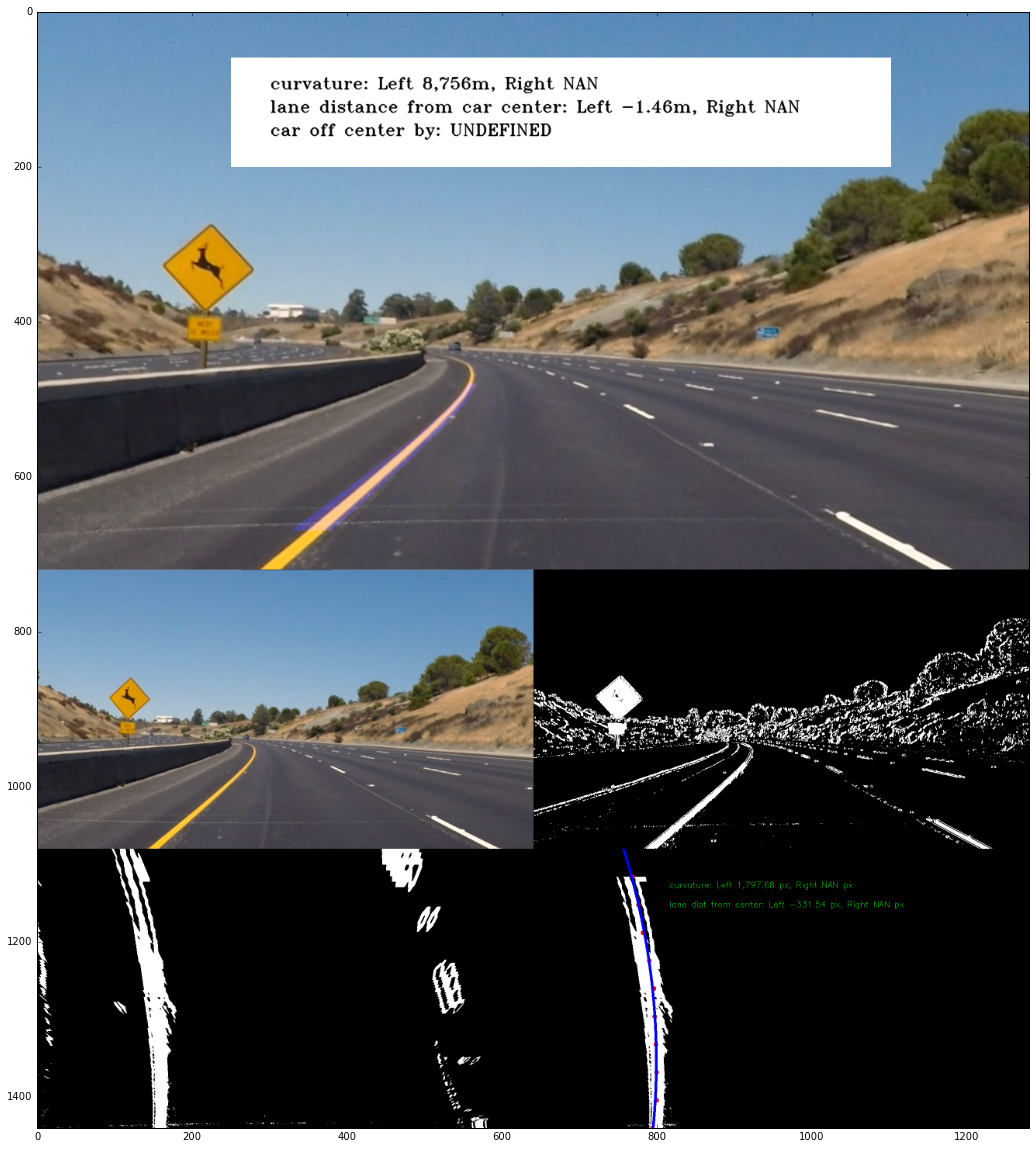

In [377]:
plt.figure(figsize=(20,20))
plt.imshow(detector._diagnostic_view);

In [484]:
detector = LaneDetector(dist_pickle['mtx'], dist_pickle['dist'])

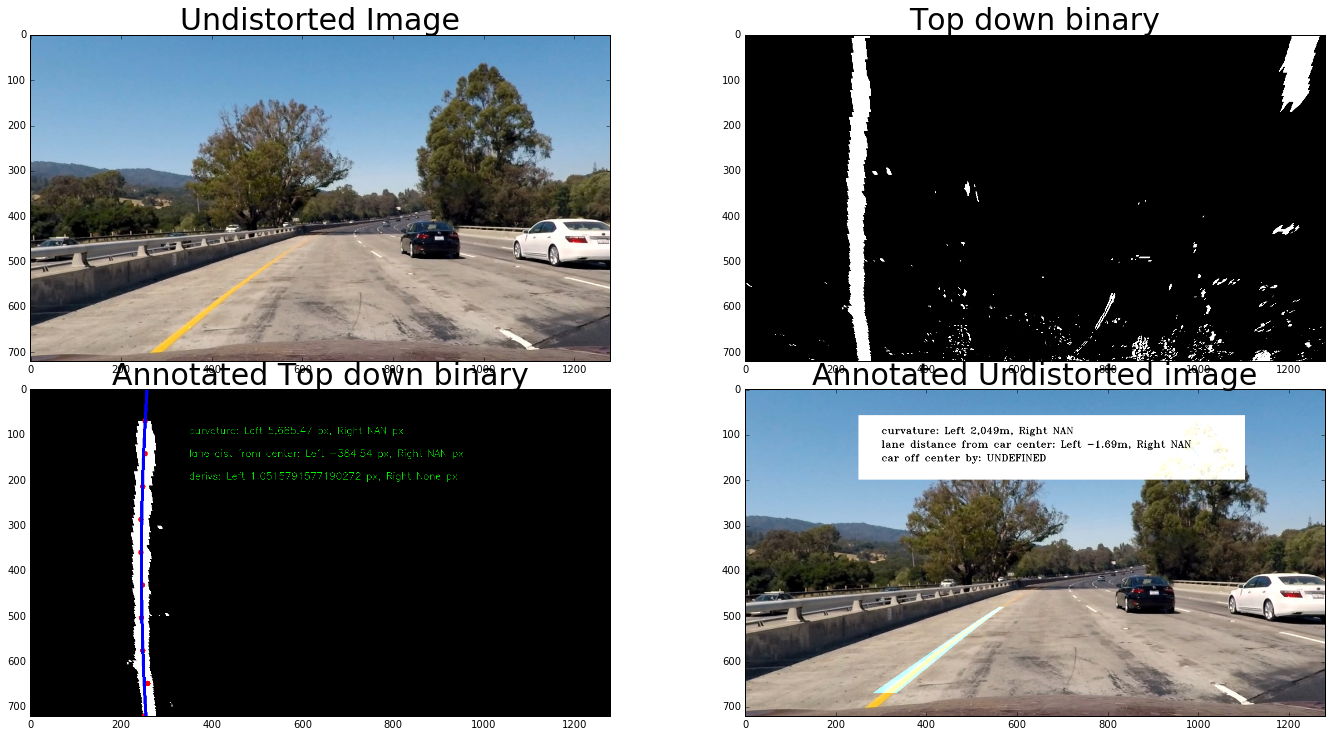

In [489]:
image = mpimg.imread('test_images/test1.jpg')

detector.process_image(image)

# Visualize
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20,10));
plt.tight_layout()
ax1.imshow(detector._undistorted_image);
ax1.set_title('Undistorted Image', fontsize=30);
ax2.imshow(detector._top_down_binary_image, cmap='gray');
ax2.set_title('Top down binary', fontsize=30);
ax3.imshow(detector._top_down_binary_with_lines_image);
ax3.set_title('Annotated Top down binary', fontsize=30);
ax4.imshow(detector._original_annotated_image);
ax4.set_title('Annotated Undistorted image', fontsize=30);

In [463]:
detector = LaneDetector(dist_pickle['mtx'], dist_pickle['dist'])

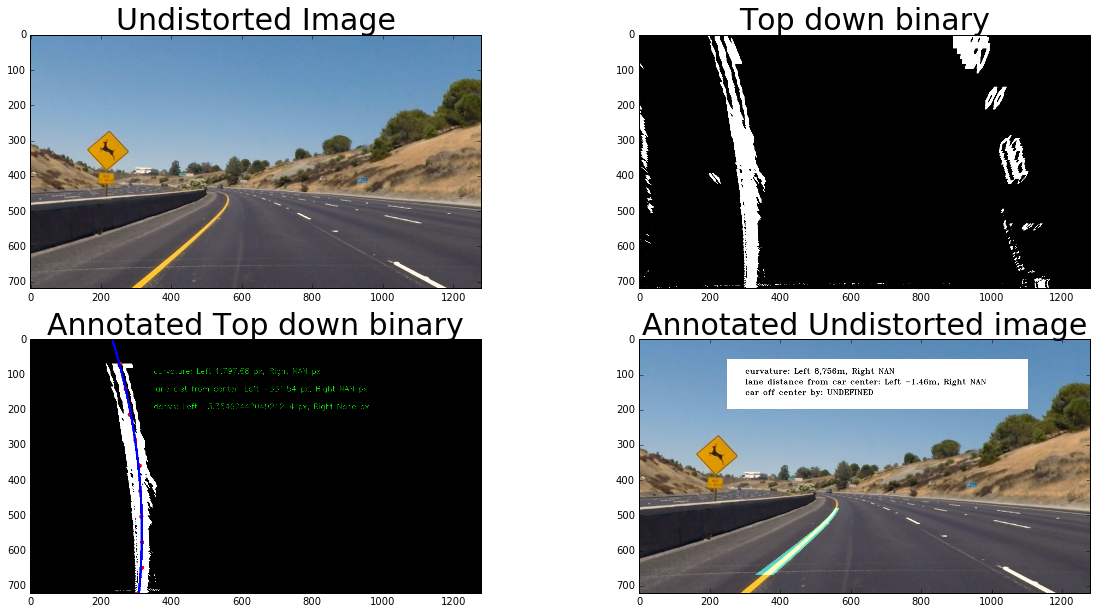

In [464]:
image = mpimg.imread('test_images/test2.jpg')

detector.process_image(image)

# Visualize
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20,10));
ax1.imshow(detector._undistorted_image);
ax1.set_title('Undistorted Image', fontsize=30);
ax2.imshow(detector._top_down_binary_image, cmap='gray');
ax2.set_title('Top down binary', fontsize=30);
ax3.imshow(detector._top_down_binary_with_lines_image);
ax3.set_title('Annotated Top down binary', fontsize=30);
ax4.imshow(detector._original_annotated_image);
ax4.set_title('Annotated Undistorted image', fontsize=30);

In [465]:
detector = LaneDetector(dist_pickle['mtx'], dist_pickle['dist'])

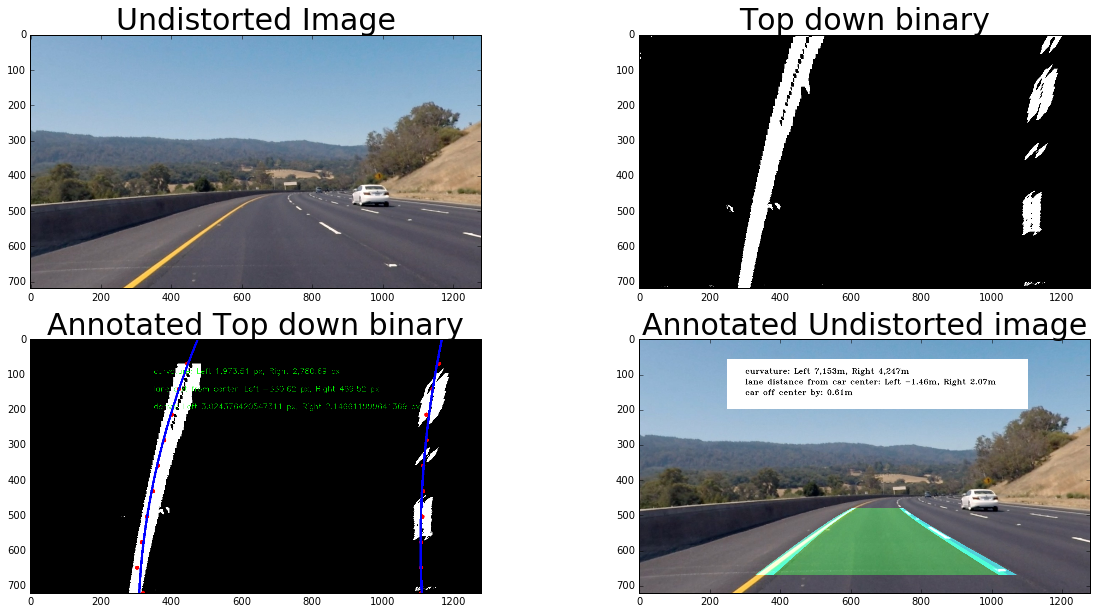

In [466]:
image = mpimg.imread('test_images/test3.jpg')

detector.process_image(image)

# Visualize
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20,10));
ax1.imshow(detector._undistorted_image);
ax1.set_title('Undistorted Image', fontsize=30);
ax2.imshow(detector._top_down_binary_image, cmap='gray');
ax2.set_title('Top down binary', fontsize=30);
ax3.imshow(detector._top_down_binary_with_lines_image);
ax3.set_title('Annotated Top down binary', fontsize=30);
ax4.imshow(detector._original_annotated_image);
ax4.set_title('Annotated Undistorted image', fontsize=30);

In [467]:
detector = LaneDetector(dist_pickle['mtx'], dist_pickle['dist'])

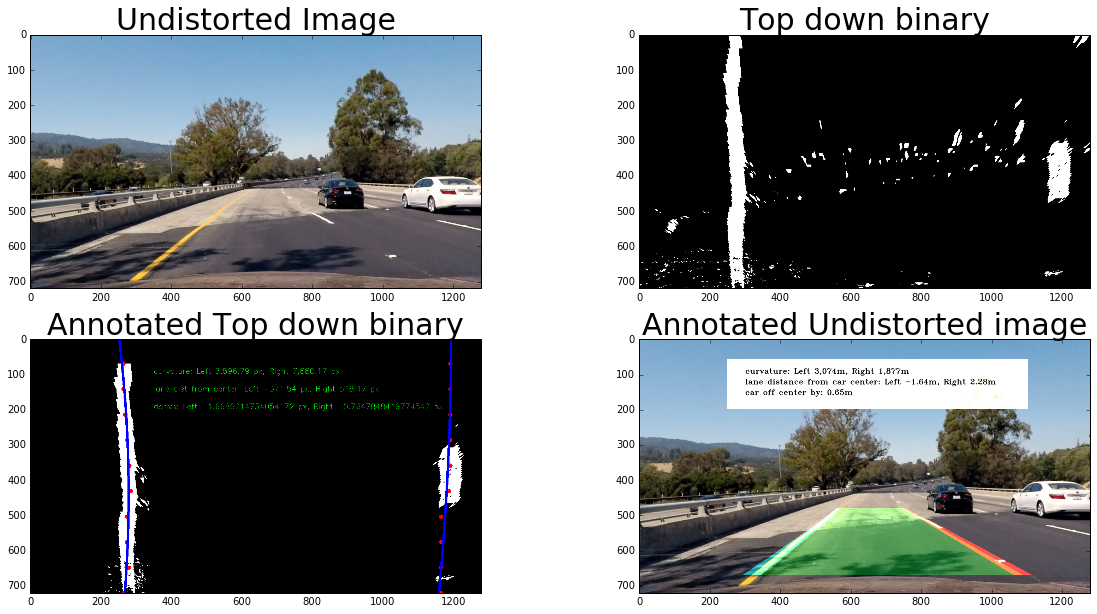

In [468]:
image = mpimg.imread('test_images/test4.jpg')

detector.process_image(image)

# Visualize
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20,10));
ax1.imshow(detector._undistorted_image);
ax1.set_title('Undistorted Image', fontsize=30);
ax2.imshow(detector._top_down_binary_image, cmap='gray');
ax2.set_title('Top down binary', fontsize=30);
ax3.imshow(detector._top_down_binary_with_lines_image);
ax3.set_title('Annotated Top down binary', fontsize=30);
ax4.imshow(detector._original_annotated_image);
ax4.set_title('Annotated Undistorted image', fontsize=30);

In [469]:
detector = LaneDetector(dist_pickle['mtx'], dist_pickle['dist'])

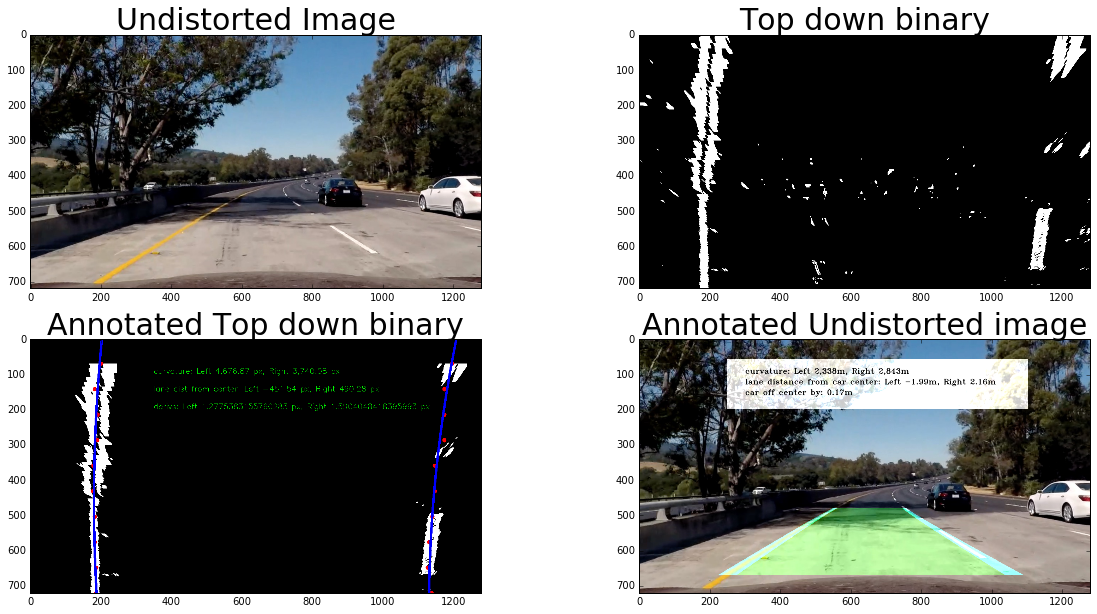

In [470]:
image = mpimg.imread('test_images/test5.jpg')

detector.process_image(image)

# Visualize
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20,10));
ax1.imshow(detector._undistorted_image);
ax1.set_title('Undistorted Image', fontsize=30);
ax2.imshow(detector._top_down_binary_image, cmap='gray');
ax2.set_title('Top down binary', fontsize=30);
ax3.imshow(detector._top_down_binary_with_lines_image);
ax3.set_title('Annotated Top down binary', fontsize=30);
ax4.imshow(detector._original_annotated_image);
ax4.set_title('Annotated Undistorted image', fontsize=30);

In [453]:
print(detector._lline._histogram_allx[-1], detector._rline._histogram_allx[-1])
print(detector._lline._y_deriv, detector._rline._y_deriv)
print(detector._rline._line_pos_m - detector._lline._line_pos_m)


187 1137
1.27753831558 1.59040484184
4.14846327424


In [471]:
detector = LaneDetector(dist_pickle['mtx'], dist_pickle['dist'])

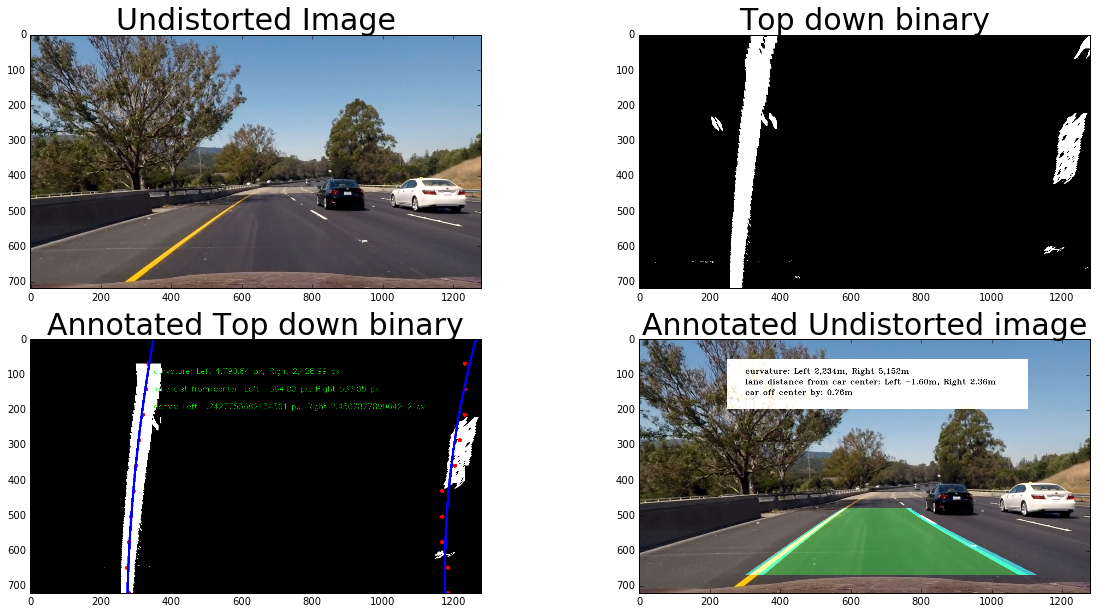

In [472]:
image = mpimg.imread('test_images/test6.jpg')

detector.process_image(image)

# Visualize
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20,10));
ax1.imshow(detector._undistorted_image);
ax1.set_title('Undistorted Image', fontsize=30);
ax2.imshow(detector._top_down_binary_image, cmap='gray');
ax2.set_title('Top down binary', fontsize=30);
ax3.imshow(detector._top_down_binary_with_lines_image);
ax3.set_title('Annotated Top down binary', fontsize=30);
ax4.imshow(detector._original_annotated_image);
ax4.set_title('Annotated Undistorted image', fontsize=30);

In [ ]:
# Once you have implemented a successful pipeline on the test images,
# you will run your algorithm on a video. 
# In the case of the video, you must search for the lane lines in the first few frames, and, 
# once you have a high-confidence detection, 
# use that information to track the position and curvature of the lines from frame to frame.

In [227]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [494]:
detector = LaneDetector(dist_pickle['mtx'], dist_pickle['dist'])
input_clip = VideoFileClip("project_video.mp4")
annotated_output = 'project_video_annotated.mp4'

In [495]:
annotated_clip = input_clip.fl_image(detector.process_image) #NOTE: this function expects color images!!
%time annotated_clip.write_videofile(annotated_output, audio=False)

[MoviePy] >>>> Building video project_video_annotated.mp4
[MoviePy] Writing video project_video_annotated.mp4



 45%|████▍     | 562/1261 [02:38<03:20,  3.49it/s]

frame 563: NOT PARALLEL



 45%|████▍     | 567/1261 [02:39<03:17,  3.52it/s]

frame 568: NOT PARALLEL



 82%|████████▏ | 1040/1261 [04:49<01:03,  3.46it/s]

frame 1041: NOT PARALLEL



 83%|████████▎ | 1047/1261 [04:51<01:01,  3.48it/s]

frame 1048: NOT PARALLEL



 83%|████████▎ | 1048/1261 [04:52<01:02,  3.41it/s]

frame 1049: NOT PARALLEL



 83%|████████▎ | 1049/1261 [04:52<01:03,  3.32it/s]

frame 1050: NOT PARALLEL



100%|█████████▉| 1260/1261 [05:50<00:00,  3.65it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_video_annotated.mp4 

CPU times: user 21min 24s, sys: 2min 41s, total: 24min 6s
Wall time: 5min 51s


In [496]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(annotated_output))

In [497]:
input_clip = VideoFileClip("challenge_video.mp4")
annotated_output = 'challenge_video_annotated.mp4'

In [498]:
detector = LaneDetector(dist_pickle['mtx'], dist_pickle['dist'])
annotated_clip = input_clip.fl_image(detector.process_image) #NOTE: this function expects color images!!
%time annotated_clip.write_videofile(annotated_output, audio=False)

[MoviePy] >>>> Building video challenge_video_annotated.mp4
[MoviePy] Writing video challenge_video_annotated.mp4



  1%|          | 6/485 [00:01<01:54,  4.20it/s]

frame 7: NOT PARALLEL



  1%|▏         | 7/485 [00:01<02:00,  3.96it/s]

frame 8: NOT PARALLEL



  7%|▋         | 33/485 [00:08<02:21,  3.19it/s]

frame 34: NOT PARALLEL



  7%|▋         | 35/485 [00:09<02:13,  3.38it/s]

frame 36: NOT PARALLEL



  8%|▊         | 37/485 [00:09<02:09,  3.47it/s]

frame 38: NOT PARALLEL



  8%|▊         | 39/485 [00:10<02:05,  3.56it/s]

frame 40: NOT PARALLEL



  8%|▊         | 41/485 [00:10<02:05,  3.53it/s]

frame 42: NOT PARALLEL



  9%|▊         | 42/485 [00:11<02:06,  3.50it/s]

frame 43: NOT PARALLEL



  9%|▉         | 43/485 [00:11<02:12,  3.34it/s]

frame 44: NOT PARALLEL



  9%|▉         | 45/485 [00:12<02:13,  3.29it/s]

frame 46: NOT PARALLEL



 10%|▉         | 47/485 [00:12<02:13,  3.29it/s]

frame 48: NOT PARALLEL



 10%|▉         | 48/485 [00:13<02:12,  3.30it/s]

frame 49: NOT PARALLEL



 10%|█         | 49/485 [00:13<02:11,  3.32it/s]

frame 50: NOT PARALLEL



 10%|█         | 50/485 [00:13<02:11,  3.31it/s]

frame 51: NOT PARALLEL



 11%|█         | 51/485 [00:14<02:13,  3.25it/s]

frame 52: NOT PARALLEL



 11%|█         | 52/485 [00:14<02:16,  3.18it/s]

frame 53: NOT PARALLEL



 11%|█         | 53/485 [00:14<02:17,  3.14it/s]

frame 54: NOT PARALLEL



 11%|█         | 54/485 [00:15<02:16,  3.15it/s]

frame 55: NOT PARALLEL



 11%|█▏        | 55/485 [00:15<02:13,  3.21it/s]

frame 56: NOT PARALLEL



 12%|█▏        | 56/485 [00:15<02:14,  3.20it/s]

frame 57: NOT PARALLEL



 12%|█▏        | 57/485 [00:15<02:12,  3.22it/s]

frame 58: NOT PARALLEL



 12%|█▏        | 58/485 [00:16<02:13,  3.20it/s]

frame 59: NOT PARALLEL



 12%|█▏        | 59/485 [00:16<02:12,  3.21it/s]

frame 60: NOT PARALLEL



 12%|█▏        | 60/485 [00:16<02:14,  3.17it/s]

frame 61: NOT PARALLEL



 13%|█▎        | 61/485 [00:17<02:15,  3.12it/s]

frame 62: NOT PARALLEL
frame 62: WRONG DISTANCE 954.6346443018128, 1279, 1.0614650355996282, 2.6814572923238438



 13%|█▎        | 62/485 [00:17<02:19,  3.03it/s]

frame 63: NOT PARALLEL
frame 63: WRONG DISTANCE 986.5527425879147, 1279, 1.1684666333898595, 2.7047561851613127



 13%|█▎        | 63/485 [00:17<02:22,  2.95it/s]

frame 64: NOT PARALLEL
frame 64: WRONG DISTANCE 1022.975561021089, 1279, 1.203715229118825, 2.7263668305702216



 13%|█▎        | 64/485 [00:18<02:22,  2.96it/s]

frame 65: NOT PARALLEL
frame 65: WRONG DISTANCE 990.3640570344633, 1279, 1.218016357472486, 2.74401588661858



 13%|█▎        | 65/485 [00:18<02:20,  2.98it/s]

frame 66: NOT PARALLEL
frame 66: WRONG DISTANCE 961.2020288533465, 1279, 1.240586077832295, 2.759057258237916



 14%|█▎        | 66/485 [00:18<02:20,  2.97it/s]

frame 67: NOT PARALLEL
frame 67: WRONG DISTANCE 1023, 1279, 1.3410105162916246, 2.771752101927691



 14%|█▍        | 67/485 [00:19<02:20,  2.98it/s]

frame 68: NOT PARALLEL
frame 68: WRONG DISTANCE 971.0043491336968, 1279, 1.35176568135975, 2.7811179436485833



 14%|█▍        | 68/485 [00:19<02:20,  2.96it/s]

frame 69: NOT PARALLEL
frame 69: WRONG DISTANCE 961.8466835309097, 1016, 1.3387139054799155, 2.6425244651140445



 14%|█▍        | 69/485 [00:19<02:18,  3.00it/s]

frame 70: NOT PARALLEL



 14%|█▍        | 70/485 [00:20<02:19,  2.98it/s]

frame 71: NOT PARALLEL
frame 71: WRONG DISTANCE 827.5941265958184, 1012, 0.7278527775306565, 2.4106902047225183



 15%|█▍        | 71/485 [00:20<02:15,  3.05it/s]

frame 72: NOT PARALLEL



 15%|█▍        | 72/485 [00:20<02:14,  3.07it/s]

frame 73: NOT PARALLEL



 15%|█▌        | 73/485 [00:21<02:11,  3.14it/s]

frame 74: NOT PARALLEL



 15%|█▌        | 74/485 [00:21<02:11,  3.13it/s]

frame 75: NOT PARALLEL



 15%|█▌        | 75/485 [00:21<02:09,  3.17it/s]

frame 76: NOT PARALLEL



 16%|█▌        | 76/485 [00:22<02:11,  3.11it/s]

frame 77: NOT PARALLEL



 16%|█▌        | 77/485 [00:22<02:09,  3.15it/s]

frame 78: NOT PARALLEL



 16%|█▌        | 78/485 [00:22<02:10,  3.12it/s]

frame 79: NOT PARALLEL



 16%|█▋        | 79/485 [00:23<02:08,  3.17it/s]

frame 80: NOT PARALLEL



 16%|█▋        | 80/485 [00:23<02:16,  2.96it/s]

frame 81: NOT PARALLEL



 17%|█▋        | 81/485 [00:23<02:25,  2.78it/s]

frame 82: NOT PARALLEL



 17%|█▋        | 82/485 [00:24<02:34,  2.61it/s]

frame 83: NOT PARALLEL



 17%|█▋        | 83/485 [00:24<02:29,  2.69it/s]

frame 84: NOT PARALLEL



 17%|█▋        | 84/485 [00:25<02:32,  2.64it/s]

frame 85: NOT PARALLEL



 18%|█▊        | 85/485 [00:25<02:34,  2.59it/s]

frame 86: NOT PARALLEL



 18%|█▊        | 86/485 [00:25<02:36,  2.55it/s]

frame 87: NOT PARALLEL



 18%|█▊        | 87/485 [00:26<02:35,  2.55it/s]

frame 88: NOT PARALLEL



 18%|█▊        | 88/485 [00:26<02:41,  2.46it/s]

frame 89: NOT PARALLEL



 18%|█▊        | 89/485 [00:27<02:40,  2.46it/s]

frame 90: NOT PARALLEL



 19%|█▊        | 90/485 [00:27<02:38,  2.48it/s]

frame 91: NOT PARALLEL



 19%|█▉        | 91/485 [00:27<02:37,  2.51it/s]

frame 92: NOT PARALLEL



 19%|█▉        | 92/485 [00:28<02:35,  2.53it/s]

frame 93: NOT PARALLEL



 19%|█▉        | 93/485 [00:28<02:37,  2.49it/s]

frame 94: NOT PARALLEL



 19%|█▉        | 94/485 [00:29<02:37,  2.49it/s]

frame 95: NOT PARALLEL



 20%|█▉        | 95/485 [00:29<02:35,  2.51it/s]

frame 96: NOT PARALLEL



 21%|██        | 102/485 [00:31<02:07,  3.01it/s]

frame 103: NOT PARALLEL



 22%|██▏       | 107/485 [00:33<02:21,  2.68it/s]

frame 108: NOT PARALLEL



 22%|██▏       | 108/485 [00:34<02:20,  2.68it/s]

frame 109: NOT PARALLEL



 22%|██▏       | 109/485 [00:34<02:26,  2.57it/s]

frame 110: NOT PARALLEL



 27%|██▋       | 132/485 [00:43<02:14,  2.63it/s]

frame 133: NOT PARALLEL



 27%|██▋       | 133/485 [00:43<02:15,  2.60it/s]

frame 134: NOT PARALLEL



 28%|██▊       | 134/485 [00:43<02:17,  2.56it/s]

frame 135: NOT PARALLEL



 28%|██▊       | 135/485 [00:44<02:20,  2.49it/s]

frame 136: NOT PARALLEL



 28%|██▊       | 136/485 [00:44<02:18,  2.52it/s]

frame 137: NOT PARALLEL



 28%|██▊       | 137/485 [00:45<02:22,  2.45it/s]

frame 138: NOT PARALLEL
frame 138: WRONG DISTANCE 506.55239048470776, 709, -0.6939783653625898, 0.9856929517430927



 28%|██▊       | 138/485 [00:45<02:25,  2.38it/s]

frame 139: NOT PARALLEL
frame 139: WRONG DISTANCE 553.0351240413388, 702, -0.6632416112512336, 0.8975853940465575



 29%|██▊       | 139/485 [00:45<02:20,  2.47it/s]

frame 140: WRONG DISTANCE 698, 842.5497925142629, 0.26372734701373385, 0.8941758091378681



 29%|██▉       | 140/485 [00:46<02:12,  2.61it/s]

frame 141: WRONG DISTANCE 742, 811.1265569175551, 0.39188446263366705, 0.8102615969863163



 29%|██▉       | 141/485 [00:46<02:13,  2.58it/s]

frame 142: NOT PARALLEL
frame 142: WRONG DISTANCE 686, 1057, -0.19865649792931114, 0.9995453919078454



 29%|██▉       | 142/485 [00:47<02:09,  2.64it/s]

frame 143: NOT PARALLEL
frame 143: WRONG DISTANCE 626.4440346754583, 1054, -0.1514163195770031, 1.1633579181757512



 29%|██▉       | 143/485 [00:47<02:03,  2.76it/s]

frame 144: WRONG DISTANCE 698, 1051, 0.20349508535044417, 1.7565772399472825



 30%|██▉       | 144/485 [00:47<02:00,  2.83it/s]

frame 145: WRONG DISTANCE 711, 946.8973702008507, 0.2426697221888181, 1.3317349829137646



 30%|██▉       | 145/485 [00:48<02:07,  2.68it/s]

frame 146: WRONG DISTANCE 689.851349548728, 966.7649218749996, 0.18621254800262185, 1.3890464397022182



 30%|███       | 146/485 [00:48<02:08,  2.63it/s]

frame 147: WRONG DISTANCE 692, 1058, 0.19195188798255708, 1.629162270526164



 30%|███       | 147/485 [00:48<02:04,  2.72it/s]

frame 148: WRONG DISTANCE 739, 1061, 0.3225378639653777, 1.654842448647349



 31%|███       | 148/485 [00:49<02:03,  2.74it/s]

frame 149: WRONG DISTANCE 736, 1058, 0.315540415540016, 1.6692320140649461



 31%|███       | 149/485 [00:49<02:07,  2.63it/s]

frame 150: WRONG DISTANCE 697.1614296027399, 988.4419054550124, 0.21324661777399595, 1.5000574752951406



 31%|███       | 150/485 [00:50<02:06,  2.65it/s]

frame 151: WRONG DISTANCE 695.8254616184993, 996.0846564604369, 0.21056610546812227, 1.5255611013094723



 31%|███       | 151/485 [00:50<02:08,  2.61it/s]

frame 152: WRONG DISTANCE 696.9312447682842, 1002.2831600144962, 0.2159219637436141, 1.5521185118692697



 31%|███▏      | 152/485 [00:50<02:10,  2.56it/s]

frame 153: WRONG DISTANCE 698.0196157758133, 998.7849569187238, 0.22298610721411344, 1.5468387949365239



 32%|███▏      | 153/485 [00:51<02:12,  2.51it/s]

frame 154: WRONG DISTANCE 693.4994279017019, 993.8810072367187, 0.20749203562159158, 1.5577353776236464



 32%|███▏      | 154/485 [00:51<02:10,  2.53it/s]

frame 155: WRONG DISTANCE 688.5934474081085, 988.8184572577622, 0.19852140335578336, 1.5531817427123384



 32%|███▏      | 155/485 [00:52<02:08,  2.58it/s]

frame 156: WRONG DISTANCE 687.9248430777681, 991.2305861567054, 0.19072451170657068, 1.617331699083399



 32%|███▏      | 156/485 [00:52<02:03,  2.65it/s]

frame 157: WRONG DISTANCE 687.0239274691354, 995.397467352927, 0.1902548520888703, 1.6138775127960592



 32%|███▏      | 157/485 [00:52<02:03,  2.65it/s]

frame 158: WRONG DISTANCE 685.8585018588659, 998.2016598274406, 0.17492258801083957, 1.6253911192746164



 33%|███▎      | 158/485 [00:53<01:58,  2.75it/s]

frame 159: WRONG DISTANCE 683.6761582842307, 1001.7683599595487, 0.15989095887153534, 1.6307575438857258



 33%|███▎      | 159/485 [00:53<01:56,  2.80it/s]

frame 160: WRONG DISTANCE 681.5148120966608, 1005.0839610222592, 0.15023530942624183, 1.6369132644337698



 33%|███▎      | 160/485 [00:53<01:54,  2.83it/s]

frame 161: WRONG DISTANCE 679.3223624263464, 1008.8858247112323, 0.1404382841483892, 1.6073396784060832



 33%|███▎      | 161/485 [00:54<01:57,  2.76it/s]

frame 162: WRONG DISTANCE 677.0390958777587, 1008.4321329615598, 0.13078420404371352, 1.606203553686806



 33%|███▎      | 162/485 [00:54<02:00,  2.68it/s]

frame 163: WRONG DISTANCE 674.3388069935462, 1008.0836937371396, 0.11648619336553272, 1.6060828895456707



 34%|███▎      | 163/485 [00:54<02:01,  2.64it/s]

frame 164: WRONG DISTANCE 671.6854788042458, 1007.206995738636, 0.10384036942674081, 1.6089438934024438



 34%|███▍      | 164/485 [00:55<01:57,  2.74it/s]

frame 165: WRONG DISTANCE 669.140479067293, 1006.2165380950707, 0.09966417960120759, 1.6074335015443186



 34%|███▍      | 165/485 [00:55<01:55,  2.78it/s]

frame 166: WRONG DISTANCE 666.8442764157778, 1004.8779975098199, 0.09104156374425385, 1.6017405729785998



 34%|███▍      | 166/485 [00:55<01:55,  2.75it/s]

frame 167: WRONG DISTANCE 664.6013983001307, 1004.6237678579776, 0.08864952044697279, 1.6115241429952087



 34%|███▍      | 167/485 [00:56<01:53,  2.80it/s]

frame 168: WRONG DISTANCE 662.6882559097921, 1004.8653513725212, 0.08500190810079088, 1.6110238046351673



 35%|███▍      | 168/485 [00:56<01:52,  2.82it/s]

frame 169: WRONG DISTANCE 661.2586991734471, 1005.0896956252336, 0.08369836730886278, 1.6144450830470418



 35%|███▍      | 169/485 [00:56<01:49,  2.89it/s]

frame 170: WRONG DISTANCE 660.3441434016083, 1005.3394793712584, 0.07966013462515685, 1.6415281338830545



 35%|███▌      | 170/485 [00:57<01:46,  2.96it/s]

frame 171: WRONG DISTANCE 659.4358516297227, 1006.8875599747469, 0.07526293941397881, 1.647301571296071



 35%|███▌      | 171/485 [00:57<01:45,  2.98it/s]

frame 172: WRONG DISTANCE 658.719416795267, 1008.9562755740268, 0.07536077151586393, 1.6480997161770063



 36%|███▌      | 173/485 [00:58<01:46,  2.93it/s]

frame 174: NOT PARALLEL



 36%|███▌      | 175/485 [00:59<01:46,  2.90it/s]

frame 176: NOT PARALLEL



 37%|███▋      | 180/485 [01:00<01:57,  2.59it/s]

frame 181: NOT PARALLEL



 37%|███▋      | 181/485 [01:01<02:01,  2.50it/s]

frame 182: NOT PARALLEL



 42%|████▏     | 202/485 [01:08<01:37,  2.91it/s]

frame 203: NOT PARALLEL



 42%|████▏     | 203/485 [01:08<01:39,  2.83it/s]

frame 204: NOT PARALLEL



 42%|████▏     | 204/485 [01:09<01:42,  2.74it/s]

frame 205: NOT PARALLEL



 42%|████▏     | 205/485 [01:09<01:44,  2.69it/s]

frame 206: NOT PARALLEL



 42%|████▏     | 206/485 [01:09<01:46,  2.62it/s]

frame 207: NOT PARALLEL



 43%|████▎     | 207/485 [01:10<01:45,  2.64it/s]

frame 208: NOT PARALLEL



 43%|████▎     | 208/485 [01:10<01:43,  2.68it/s]

frame 209: NOT PARALLEL



 43%|████▎     | 209/485 [01:10<01:41,  2.71it/s]

frame 210: NOT PARALLEL



 43%|████▎     | 210/485 [01:11<01:40,  2.72it/s]

frame 211: NOT PARALLEL



 44%|████▎     | 211/485 [01:11<01:38,  2.78it/s]

frame 212: NOT PARALLEL



 44%|████▎     | 212/485 [01:12<01:40,  2.72it/s]

frame 213: NOT PARALLEL



 44%|████▍     | 213/485 [01:12<01:39,  2.74it/s]

frame 214: NOT PARALLEL



 44%|████▍     | 214/485 [01:12<01:37,  2.79it/s]

frame 215: NOT PARALLEL



 44%|████▍     | 215/485 [01:13<01:36,  2.79it/s]

frame 216: NOT PARALLEL



 45%|████▍     | 216/485 [01:13<01:41,  2.65it/s]

frame 217: NOT PARALLEL



 45%|████▍     | 217/485 [01:13<01:42,  2.60it/s]

frame 218: NOT PARALLEL



 45%|████▍     | 218/485 [01:14<01:44,  2.55it/s]

frame 219: NOT PARALLEL



 45%|████▌     | 219/485 [01:14<01:44,  2.55it/s]

frame 220: NOT PARALLEL



 45%|████▌     | 220/485 [01:15<01:44,  2.55it/s]

frame 221: NOT PARALLEL



 46%|████▌     | 221/485 [01:15<01:42,  2.58it/s]

frame 222: NOT PARALLEL



 46%|████▌     | 222/485 [01:15<01:43,  2.54it/s]

frame 223: NOT PARALLEL



 46%|████▌     | 223/485 [01:16<01:43,  2.54it/s]

frame 224: NOT PARALLEL



 46%|████▌     | 224/485 [01:16<01:40,  2.59it/s]

frame 225: NOT PARALLEL



 46%|████▋     | 225/485 [01:17<01:40,  2.58it/s]

frame 226: NOT PARALLEL



 47%|████▋     | 226/485 [01:17<01:40,  2.57it/s]

frame 227: NOT PARALLEL



 47%|████▋     | 228/485 [01:18<01:38,  2.60it/s]

frame 229: NOT PARALLEL



 48%|████▊     | 232/485 [01:19<01:34,  2.67it/s]

frame 233: NOT PARALLEL



 48%|████▊     | 233/485 [01:20<01:38,  2.56it/s]

frame 234: NOT PARALLEL



 48%|████▊     | 234/485 [01:20<01:39,  2.53it/s]

frame 235: NOT PARALLEL



 48%|████▊     | 235/485 [01:20<01:35,  2.60it/s]

frame 236: NOT PARALLEL



 49%|████▊     | 236/485 [01:21<01:32,  2.70it/s]

frame 237: NOT PARALLEL



 49%|████▉     | 237/485 [01:21<01:33,  2.65it/s]

frame 238: NOT PARALLEL



 68%|██████▊   | 328/485 [01:49<00:44,  3.54it/s]

frame 329: NOT PARALLEL



 68%|██████▊   | 329/485 [01:49<00:45,  3.45it/s]

frame 330: NOT PARALLEL



 68%|██████▊   | 330/485 [01:50<00:45,  3.39it/s]

frame 331: NOT PARALLEL



 69%|██████▉   | 334/485 [01:51<00:44,  3.42it/s]

frame 335: NOT PARALLEL



 70%|██████▉   | 339/485 [01:52<00:43,  3.39it/s]

frame 340: NOT PARALLEL



 70%|███████   | 340/485 [01:52<00:43,  3.34it/s]

frame 341: NOT PARALLEL



 71%|███████   | 342/485 [01:53<00:46,  3.07it/s]

frame 343: NOT PARALLEL



 71%|███████   | 343/485 [01:54<00:49,  2.89it/s]

frame 344: NOT PARALLEL



 71%|███████   | 344/485 [01:54<00:50,  2.81it/s]

frame 345: NOT PARALLEL



 76%|███████▋  | 371/485 [02:03<00:38,  2.97it/s]

frame 372: NOT PARALLEL



100%|██████████| 485/485 [02:38<00:00,  3.05it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: challenge_video_annotated.mp4 

CPU times: user 8min 16s, sys: 1min 14s, total: 9min 30s
Wall time: 2min 40s


In [499]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(annotated_output))

In [479]:
input_clip = VideoFileClip("harder_challenge_video.mp4")
annotated_output = 'harder_challenge_video_annotated.mp4'

In [480]:
detector = LaneDetector(dist_pickle['mtx'], dist_pickle['dist'])
annotated_clip = input_clip.fl_image(detector.process_image) #NOTE: this function expects color images!!
%time annotated_clip.write_videofile(annotated_output, audio=False)

[MoviePy] >>>> Building video harder_challenge_video_annotated.mp4
[MoviePy] Writing video harder_challenge_video_annotated.mp4


  2%|▏         | 24/1200 [00:06<05:17,  3.70it/s]

frame 25: NOT PARALLEL


  2%|▏         | 26/1200 [00:07<05:26,  3.60it/s]

frame 27: NOT PARALLEL


  2%|▏         | 27/1200 [00:07<05:24,  3.61it/s]

frame 28: NOT PARALLEL


  2%|▏         | 28/1200 [00:07<05:22,  3.63it/s]

frame 29: NOT PARALLEL


  2%|▏         | 29/1200 [00:08<05:28,  3.57it/s]

frame 30: NOT PARALLEL


  2%|▎         | 30/1200 [00:08<05:36,  3.48it/s]

frame 31: NOT PARALLEL


  3%|▎         | 31/1200 [00:08<05:46,  3.38it/s]

frame 32: NOT PARALLEL


  3%|▎         | 32/1200 [00:09<05:56,  3.27it/s]

frame 33: NOT PARALLEL


  3%|▎         | 33/1200 [00:09<05:58,  3.26it/s]

frame 34: NOT PARALLEL


  6%|▌         | 74/1200 [00:21<05:22,  3.49it/s]

frame 75: NOT PARALLEL


 10%|█         | 123/1200 [00:34<05:07,  3.50it/s]

frame 124: NOT PARALLEL


 11%|█         | 131/1200 [00:37<05:35,  3.19it/s]

frame 132: NOT PARALLEL


 11%|█         | 134/1200 [00:37<05:04,  3.50it/s]

frame 135: WRONG DISTANCE 278, 281.5002005003738, -1.5732668250133905, -1.5651454873184856


 11%|█▏        | 135/1200 [00:38<05:04,  3.49it/s]

frame 136: NOT PARALLEL


 11%|█▏        | 136/1200 [00:38<05:08,  3.44it/s]

frame 137: NOT PARALLEL


 11%|█▏        | 137/1200 [00:38<05:10,  3.43it/s]

frame 138: NOT PARALLEL


 12%|█▏        | 139/1200 [00:39<05:07,  3.45it/s]

frame 140: WRONG DISTANCE 290.98782690913725, 297, -1.5639507170226603, -1.5609722321212858


 12%|█▏        | 140/1200 [00:39<05:06,  3.46it/s]

frame 141: WRONG DISTANCE 243, 308, -1.7239475548898677, -1.5285131108295562


 12%|█▏        | 141/1200 [00:39<05:09,  3.43it/s]

frame 142: WRONG DISTANCE 244, 310, -1.7228868904787253, -1.525791822703031


 12%|█▏        | 142/1200 [00:40<05:10,  3.41it/s]

frame 143: WRONG DISTANCE 243, 309, -1.7315126327866144, -1.5352514854508514


 12%|█▏        | 145/1200 [00:41<05:12,  3.38it/s]

frame 146: WRONG DISTANCE 302, 261.9813439662828, -1.614067527888566, -1.7141051674288084


 13%|█▎        | 151/1200 [00:42<05:12,  3.36it/s]

frame 152: WRONG DISTANCE 227.57418002361538, 398, -1.8481642673531795, -1.0407118138888622


 17%|█▋        | 201/1200 [00:54<04:25,  3.76it/s]

frame 202: WRONG DISTANCE 391, 493.77639721871424, -1.256661427122583, -0.6717078295771902


 17%|█▋        | 202/1200 [00:54<04:42,  3.53it/s]

frame 203: WRONG DISTANCE 364, 434, -1.3624511177868033, -0.9381641633695336


 17%|█▋        | 208/1200 [00:56<04:43,  3.49it/s]

frame 209: WRONG DISTANCE 328, 238.93104803825327, -1.5502655274185575, -1.8309767208154064


 18%|█▊        | 210/1200 [00:57<04:51,  3.40it/s]

frame 211: NOT PARALLEL


 18%|█▊        | 211/1200 [00:57<04:56,  3.33it/s]

frame 212: NOT PARALLEL


 18%|█▊        | 213/1200 [00:58<05:04,  3.24it/s]

frame 214: NOT PARALLEL


 18%|█▊        | 214/1200 [00:58<05:11,  3.17it/s]

frame 215: NOT PARALLEL


 18%|█▊        | 215/1200 [00:58<05:09,  3.18it/s]

frame 216: NOT PARALLEL


 21%|██        | 252/1200 [01:08<04:42,  3.36it/s]

frame 253: WRONG DISTANCE 1042, 1058.7172981259346, 1.8027995679276785, 1.867256256363929


 25%|██▌       | 300/1200 [01:22<04:10,  3.59it/s]

frame 301: WRONG DISTANCE 1130.3102921576879, 958, 2.1584161170164484, 1.5101257506063999


 26%|██▌       | 314/1200 [01:26<04:17,  3.43it/s]

frame 315: NOT PARALLEL


 26%|██▋       | 317/1200 [01:27<03:57,  3.72it/s]

frame 318: WRONG DISTANCE 318.88322256126037, 328, -1.4799003224101974, -1.4377536743614223


 27%|██▋       | 320/1200 [01:28<03:52,  3.79it/s]

frame 321: WRONG DISTANCE 309, 305.0395896172371, -1.5013177819760948, -1.5138212902803119


 27%|██▋       | 322/1200 [01:28<03:51,  3.79it/s]

frame 323: WRONG DISTANCE 312, 321.97321230242204, -1.48520042403477, -1.4608364109500551


 28%|██▊       | 334/1200 [01:32<03:53,  3.72it/s]

frame 335: WRONG DISTANCE 324.1449003928167, 388, -1.3950009602264397, -1.1832194210485618


 29%|██▉       | 353/1200 [01:37<04:21,  3.24it/s]

frame 354: NOT PARALLEL


 30%|██▉       | 359/1200 [01:39<04:24,  3.18it/s]

frame 360: NOT PARALLEL


 30%|███       | 360/1200 [01:39<04:25,  3.16it/s]

frame 361: WRONG DISTANCE 310, 396, -1.5520626612381545, -1.0625343500070445


 30%|███       | 363/1200 [01:40<04:12,  3.31it/s]

frame 364: WRONG DISTANCE 338, 389.43191434016035, -1.4451933717270833, -1.1567451372639834


 30%|███       | 364/1200 [01:41<04:13,  3.30it/s]

frame 365: WRONG DISTANCE 311, 381, -1.5305744300749753, -1.2136772674315386


 30%|███       | 365/1200 [01:41<04:15,  3.26it/s]

frame 366: WRONG DISTANCE 312, 379, -1.5279330939952338, -1.2319072719694484


 31%|███       | 372/1200 [01:43<03:45,  3.68it/s]

frame 373: WRONG DISTANCE 327.1777573185554, 349, -1.4823406090919138, -1.4051549699416475


 32%|███▏      | 380/1200 [01:45<03:44,  3.66it/s]

frame 381: NOT PARALLEL


 32%|███▎      | 390/1200 [01:48<04:29,  3.00it/s]

frame 391: NOT PARALLEL


 33%|███▎      | 391/1200 [01:49<04:27,  3.03it/s]

frame 392: NOT PARALLEL


 35%|███▍      | 415/1200 [01:55<03:15,  4.02it/s]

frame 416: WRONG DISTANCE 1191, 1262, 2.426972498908839, 2.763501397524902


 35%|███▍      | 416/1200 [01:55<03:30,  3.72it/s]

frame 417: NOT PARALLEL


 35%|███▍      | 418/1200 [01:56<03:49,  3.41it/s]

frame 419: WRONG DISTANCE 1210, 1267.8677078949215, 2.539233272272298, 2.7312185875962287


 35%|███▍      | 419/1200 [01:56<03:57,  3.29it/s]

frame 420: WRONG DISTANCE 1210, 1277, 2.5498642179900854, 2.76997966327252


 35%|███▌      | 420/1200 [01:56<04:02,  3.22it/s]

frame 421: WRONG DISTANCE 1205, 1271, 2.557577554803575, 2.7689142245384284


 35%|███▌      | 421/1200 [01:57<04:06,  3.16it/s]

frame 422: WRONG DISTANCE 1182, 1254, 2.44762063912382, 2.6877737453277835


 35%|███▌      | 422/1200 [01:57<04:12,  3.08it/s]

frame 423: WRONG DISTANCE 1188, 1253, 2.509880368492852, 2.7243690202356987


 35%|███▌      | 423/1200 [01:57<04:16,  3.03it/s]

frame 424: WRONG DISTANCE 1213, 1278, 2.602264682083872, 2.801677811427632


 35%|███▌      | 425/1200 [01:58<04:15,  3.04it/s]

frame 426: NOT PARALLEL


 36%|███▌      | 426/1200 [01:58<04:20,  2.97it/s]

frame 427: WRONG DISTANCE 1163, 1243, 2.3285626402222195, 2.6582908958967955


 36%|███▌      | 427/1200 [01:59<04:22,  2.94it/s]

frame 428: WRONG DISTANCE 1168, 1237, 2.376070697815344, 2.6501706029270022


 36%|███▌      | 428/1200 [01:59<04:21,  2.95it/s]

frame 429: WRONG DISTANCE 1174, 1243, 2.4217213410143072, 2.6825486630768385


 36%|███▌      | 429/1200 [01:59<04:17,  2.99it/s]

frame 430: WRONG DISTANCE 1181, 1248, 2.4452590518486765, 2.6850927998118026


 36%|███▌      | 430/1200 [02:00<04:23,  2.92it/s]

frame 431: WRONG DISTANCE 1181, 1249, 2.4510111177777536, 2.695824857283009


 36%|███▌      | 431/1200 [02:00<04:21,  2.94it/s]

frame 432: WRONG DISTANCE 1188, 1254, 2.489428535537945, 2.719406270841961


 36%|███▌      | 432/1200 [02:00<04:16,  2.99it/s]

frame 433: WRONG DISTANCE 1196, 1262, 2.519729799319388, 2.7437086335584944


 36%|███▌      | 433/1200 [02:01<04:18,  2.97it/s]

frame 434: WRONG DISTANCE 1203, 1269, 2.5803618186418005, 2.7957076811782358


 36%|███▌      | 434/1200 [02:01<04:22,  2.92it/s]

frame 435: WRONG DISTANCE 1159, 1224, 2.3805942210840203, 2.6353505792221417


 37%|███▋      | 441/1200 [02:03<03:56,  3.21it/s]

frame 442: WRONG DISTANCE 1001, 1253.2565728172929, 1.6338114878078316, 2.772925025946327


 44%|████▍     | 532/1200 [02:22<02:48,  3.96it/s]

frame 533: WRONG DISTANCE 148.93773528105123, 120, -2.1121689628141818, -2.182374753584679


 44%|████▍     | 534/1200 [02:23<02:59,  3.71it/s]

frame 535: WRONG DISTANCE 122, 146.12116243453042, -2.1756509903098453, -2.1031702484918635


 45%|████▍     | 537/1200 [02:24<03:07,  3.54it/s]

frame 538: WRONG DISTANCE 156.71704223952486, 128, -2.082404582816982, -2.148048891973082


 48%|████▊     | 572/1200 [02:34<03:13,  3.24it/s]

frame 573: NOT PARALLEL


 50%|████▉     | 595/1200 [02:41<02:43,  3.70it/s]

frame 596: NOT PARALLEL


 50%|█████     | 606/1200 [02:43<02:28,  4.00it/s]

frame 607: NOT PARALLEL


 57%|█████▋    | 681/1200 [03:05<02:31,  3.43it/s]

frame 682: NOT PARALLEL


 59%|█████▉    | 708/1200 [03:11<02:00,  4.07it/s]

frame 709: NOT PARALLEL


 59%|█████▉    | 712/1200 [03:12<01:56,  4.19it/s]

frame 713: WRONG DISTANCE 105, 444.6020769032922, -2.372581057175314, -0.8880125122407391


 60%|█████▉    | 719/1200 [03:14<01:58,  4.05it/s]

frame 720: NOT PARALLEL


 60%|██████    | 723/1200 [03:15<02:07,  3.74it/s]

frame 724: WRONG DISTANCE 413, 464.83690054479956, -1.0975347100963075, -0.8165936784623156


 61%|██████    | 730/1200 [03:17<02:11,  3.57it/s]

frame 731: WRONG DISTANCE 338.1798529274222, 398, -1.354113124830899, -1.1588137792406823


 61%|██████    | 733/1200 [03:18<02:11,  3.55it/s]

frame 734: WRONG DISTANCE 326.20818719603454, 362, -1.3966955500600973, -1.2740991927271232


 62%|██████▏   | 745/1200 [03:21<02:12,  3.44it/s]

frame 746: WRONG DISTANCE 1043, 296.1618334677798, 1.814251907039561, -1.5320973637840312


 62%|██████▏   | 747/1200 [03:22<02:13,  3.40it/s]

frame 748: WRONG DISTANCE 1048.7019993043866, 1028, 1.8548928487225669, 1.7770852975230123


 65%|██████▍   | 776/1200 [03:31<02:05,  3.38it/s]

frame 777: NOT PARALLEL


 65%|██████▌   | 780/1200 [03:32<02:08,  3.26it/s]

frame 781: NOT PARALLEL


 66%|██████▌   | 786/1200 [03:34<02:02,  3.39it/s]

frame 787: NOT PARALLEL


 66%|██████▌   | 787/1200 [03:34<02:02,  3.38it/s]

frame 788: NOT PARALLEL


 67%|██████▋   | 808/1200 [03:40<01:53,  3.47it/s]

frame 809: NOT PARALLEL


 69%|██████▉   | 828/1200 [03:45<01:41,  3.67it/s]

frame 829: NOT PARALLEL


 70%|███████   | 840/1200 [03:49<01:32,  3.91it/s]

frame 841: NOT PARALLEL


 70%|███████   | 844/1200 [03:50<01:31,  3.89it/s]

frame 845: WRONG DISTANCE 425, 398.79383285984784, -1.0532649115542294, -1.151675657259463


 74%|███████▍  | 888/1200 [04:01<01:20,  3.87it/s]

frame 889: WRONG DISTANCE 270, 257.9995861391695, -1.5698412711460679, -1.6217843149340916


 74%|███████▍  | 893/1200 [04:02<01:21,  3.79it/s]

frame 894: WRONG DISTANCE 296.0885141928542, 324, -1.5016414620187784, -1.425842310199661


 75%|███████▍  | 895/1200 [04:03<01:21,  3.73it/s]

frame 896: WRONG DISTANCE 282.96510416666644, 314, -1.5429328574093844, -1.456305255330394


 75%|███████▍  | 898/1200 [04:04<01:19,  3.78it/s]

frame 899: WRONG DISTANCE 305, 303.1694865319864, -1.5128663246288399, -1.5182805497587766


 75%|███████▌  | 901/1200 [04:05<01:18,  3.82it/s]

frame 902: WRONG DISTANCE 281.77401532688, 314, -1.5432805674170342, -1.452270794728732


 78%|███████▊  | 931/1200 [04:12<01:13,  3.67it/s]

frame 932: NOT PARALLEL


 78%|███████▊  | 933/1200 [04:13<01:11,  3.71it/s]

frame 934: NOT PARALLEL


 78%|███████▊  | 935/1200 [04:13<01:11,  3.69it/s]

frame 936: NOT PARALLEL


 79%|███████▉  | 947/1200 [04:17<01:09,  3.64it/s]

frame 948: NOT PARALLEL


 80%|███████▉  | 954/1200 [04:19<01:04,  3.84it/s]

frame 955: NOT PARALLEL


 80%|███████▉  | 956/1200 [04:19<01:02,  3.90it/s]

frame 957: WRONG DISTANCE 247, 266.077431286242, -1.741805345691956, -1.6792709810711837


 80%|███████▉  | 958/1200 [04:20<01:01,  3.91it/s]

frame 959: WRONG DISTANCE 290, 296.3282012836698, -1.6355478557030572, -1.597714264837529


 80%|████████  | 961/1200 [04:20<01:02,  3.84it/s]

frame 962: NOT PARALLEL


 81%|████████  | 969/1200 [04:22<00:59,  3.91it/s]

frame 970: NOT PARALLEL


 82%|████████▏ | 984/1200 [04:26<00:57,  3.79it/s]

frame 985: WRONG DISTANCE 757.2432152836229, 746, 0.5339115522439452, 0.47111744372739695


 82%|████████▏ | 986/1200 [04:27<00:55,  3.83it/s]

frame 987: WRONG DISTANCE 676, 705.3393861941167, 0.15170231590388392, 0.3005712716478024


 82%|████████▏ | 987/1200 [04:27<00:56,  3.75it/s]

frame 988: WRONG DISTANCE 628, 692, -0.07390170314671242, 0.2462751908518321


 82%|████████▏ | 989/1200 [04:28<00:55,  3.80it/s]

frame 990: WRONG DISTANCE 592.683534272119, 591, -0.19385960173898006, -0.19809222474413601


 83%|████████▎ | 992/1200 [04:28<00:53,  3.91it/s]

frame 993: WRONG DISTANCE 493.0749583508695, 508, -0.6841596275287325, -0.5284583169624775


 83%|████████▎ | 998/1200 [04:30<00:45,  4.43it/s]

frame 999: WRONG DISTANCE 464, 533, -0.7667498485391289, -0.49507661456663143


 84%|████████▍ | 1012/1200 [04:33<00:48,  3.91it/s]

frame 1013: NOT PARALLEL


 96%|█████████▌| 1151/1200 [05:10<00:13,  3.53it/s]

frame 1152: NOT PARALLEL


 96%|█████████▌| 1152/1200 [05:11<00:13,  3.53it/s]

frame 1153: NOT PARALLEL


 96%|█████████▌| 1153/1200 [05:11<00:13,  3.49it/s]

frame 1154: NOT PARALLEL


 96%|█████████▋| 1157/1200 [05:12<00:11,  3.67it/s]

frame 1158: WRONG DISTANCE 355, 366.38025407430735, -1.3944479890916173, -1.3510567181125652


 96%|█████████▋| 1158/1200 [05:12<00:11,  3.61it/s]

frame 1159: NOT PARALLEL


 97%|█████████▋| 1160/1200 [05:13<00:11,  3.43it/s]

frame 1161: WRONG DISTANCE 317, 353.07933530910896, -1.5206370118944645, -1.3907441012723154


 97%|█████████▋| 1165/1200 [05:14<00:09,  3.53it/s]

frame 1166: WRONG DISTANCE 314, 281.08737139917673, -1.5306979844291408, -1.627547119066687


 97%|█████████▋| 1168/1200 [05:15<00:08,  3.64it/s]

frame 1169: WRONG DISTANCE 346, 316.85895573208916, -1.4071408469025313, -1.5153749381352115


 97%|█████████▋| 1169/1200 [05:15<00:08,  3.60it/s]

frame 1170: WRONG DISTANCE 341, 406, -1.4232144886015707, -1.0463803674664154


 98%|█████████▊| 1170/1200 [05:16<00:08,  3.58it/s]

frame 1171: WRONG DISTANCE 335, 406, -1.4453002458829647, -1.0472500151878432


100%|█████████▉| 1199/1200 [05:24<00:00,  3.28it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: harder_challenge_video_annotated.mp4 

CPU times: user 16min 37s, sys: 2min 32s, total: 19min 10s
Wall time: 5min 27s


In [481]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(annotated_output))